# Проект-РосКино

### Описание данных
- `title` — название фильма;
- `puNumber` — номер прокатного удостоверения;
- `show_start_date` — дата премьеры фильма;
- `type` — тип фильма;
- `film_studio` — студия-производитель;
- `production_country` — страна-производитель;
- `director` — режиссёр;
- `producer` — продюсер;
- `age_restriction` — возрастная категория;
- `refundable_support` *—* объём возвратных средств государственной поддержки;
- `nonrefundable_support` *—* объём невозвратных средств государственной поддержки;
- `financing_source` *—* источник государственного финансирования;
- `budget` — общий бюджет фильма;
- Столбец `budget` уже включает в себя полный объём государственной поддержки. 
Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку. 
- `ratings` — рейтинг фильма на КиноПоиске;
- `genres` — жанр фильма.
- `puNumber` — номер прокатного удостоверения;
- `box_office` — сборы в рублях.


**Цели исследования:**
1. Посмотрите, сколько фильмов выходило в прокат каждый год. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализируйте, как эта доля менялась по годам.
2. Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?
3. С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года
4. Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+») на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.
5. Исследуйте фильмы, которые получили государственную поддержку(На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных)
6. Напишите общий вывод


In [1]:
#импортируем нужные библиотеки для работы с данными
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import numpy as np
pd.options.display.float_format = '{:.2f}'.format

In [2]:
server_movies = '/datasets/mkrf_movies.csv'
server_shows = '/datasets/mkrf_shows.csv'    

local_movies = 'mkrf_movies.csv'
local_shows = 'mkrf_shows.csv'
try:
    movies = pd.read_csv(server_movies)
    shows = pd.read_csv(server_shows)
except: 
    movies = pd.read_csv(local_movies)
    shows = pd.read_csv(local_shows)

## 1. Изучение данных из файла

In [3]:
#общая информация о таблице
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [4]:
#посмотрим на 5 первых строк
movies.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [5]:
#посмотрим на 5 первых строк
shows.head()

,puNumber,box_office
0,111000113,2450.00
1,111000115,61040.00
2,111000116,153030013.40
3,111000117,12260956.00
4,111000118,163684057.79


In [6]:
#общая информация о таблице
shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


In [7]:
#посмотрим типы данных
movies.dtypes

title                     object
puNumber                  object
show_start_date           object
type                      object
film_studio               object
production_country        object
director                  object
producer                  object
age_restriction           object
refundable_support       float64
nonrefundable_support    float64
budget                   float64
financing_source          object
ratings                   object
genres                    object
dtype: object

In [8]:
#посмотрим типы данных
shows.dtypes

puNumber        int64
box_office    float64
dtype: object

- Два небольших датафрейма, сразу можно отметить что типы данных нужно изменить, объеденить их и продолжим знакомиться с ними.

## 2. Предобработка данных

In [9]:
#посмотрим пропущенные значения 
movies['puNumber'].isna().sum()

0

In [10]:
#приведем к целочисленному типу (можно раскоментировать и изучить ошибку)
#movies['puNumber'] = movies['puNumber'].astype('int')

In [11]:
#изучим эту ошибку(недопустимый литерал для int() с основанием 10: 'нет')
movies[movies['puNumber'] == 'нет']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#удалим эту строку, большинство значений в ней пропущено
movies = movies.drop(labels = [1797], axis = 0)

In [13]:
#проверим
movies[movies['puNumber'] == 'нет']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres


In [14]:
#приведем к целочисленному типу
movies['puNumber'] = movies['puNumber'].astype('int')

In [15]:
#объеденим датафреймы для удобства
df = movies.merge(shows, on='puNumber', how='outer')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int32  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [17]:
#проверим
df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [18]:
shows['box_office'].count()

3158

In [19]:
df['box_office'].count()

3158

In [20]:
# приводим название столбца 'puNumber' к хорошему стилю(змеиный_регистр)
df = df.rename(columns={'puNumber': 'pu_number'})

In [21]:
#заменим тип данных в столбце 'show_start_date' на datetime64 
df['show_start_date'] = pd.to_datetime(df['show_start_date'], format='%Y-%m-%dT%H:%M:%S.%fZ')                                                                     

In [22]:
#проверим
df.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [23]:
df['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

In [24]:
#посмотрим на эти строки
df[df['ratings'] == '99%']

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
259,Прошлое,221030715,2015-07-29 12:00:00,Художественный,"20 Сенчюри Фокс де Архентина, Чемо, ЭйчБи Филм...",Аргентина - Бразилия,Эктор Бабенко,"Эктор Бабенко, Оскар Крамер, Хуго Сидмэн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,99%,"ужасы,триллер,драма",NaN
1341,Сказка о добре и Вре,111008913,2013-11-15 12:00:00,Художественный,"НП ""Студия игрового кино ""Лик""",Россия,Е.Шиляева,К.Терещенко,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,99%,"триллер,драма,детектив",NaN
1804,Спираль.,111001014,2014-01-30 12:00:00,Художественный,"ООО ""Компания Питон""",Россия,А.Волгин,Е.Ковалева,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,99%,"аниме,мультфильм,ужасы",4295.00
6881,Животные рядом со Святыми,112003719,2019-05-03 12:00:00,Документальный,"ООО ""Кинопрограмма ""XXI век""",Россия,Т.Мирошник,"В.Есинов, Е.Калинина",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,99%,"криминал,драма",NaN


- для этих фильмов предлагаю взять данные с сайта [кинопоиск](https://www.kinopoisk.ru/), т.к рейтинг взят с этого сайта
- сборы(box_office) - если в  долларах предлагаю переводить по дате с сайта [центробанка рф ](https://www.cbr.ru/currency_base/daily/)

In [25]:
df.loc[df['title'] == 'Прошлое', 'ratings'] = 6.7
df.loc[df['title'] == 'Прошлое', 'box_office'] = round(40611*60.2231, 1)
#проверим
df.loc[df['title'] == 'Прошлое']

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
259,Прошлое,221030715,2015-07-29 12:00:00,Художественный,"20 Сенчюри Фокс де Архентина, Чемо, ЭйчБи Филм...",Аргентина - Бразилия,Эктор Бабенко,"Эктор Бабенко, Оскар Крамер, Хуго Сидмэн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.70,"ужасы,триллер,драма",2445720.30


In [26]:
#для этого фильма отсутствуют данные, заменим рейтинг на 0
df.loc[df['title'] == 'Сказка о добре и Вре', 'ratings'] = 0
#проверим
df.loc[df['title'] == 'Сказка о добре и Вре']

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1341,Сказка о добре и Вре,111008913,2013-11-15 12:00:00,Художественный,"НП ""Студия игрового кино ""Лик""",Россия,Е.Шиляева,К.Терещенко,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,0,"триллер,драма,детектив",NaN


In [27]:
#заменим рейтинг
df.loc[df['title'] == 'Спираль.', 'ratings'] = 5.0
#так же поправим сборы
df.loc[df['title'] == 'Спираль.', 'box_office'] = round(1637432*34.5633, 1)
#проверим
df.loc[df['title'] == 'Спираль.']

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1804,Спираль.,111001014,2014-01-30 12:00:00,Художественный,"ООО ""Компания Питон""",Россия,А.Волгин,Е.Ковалева,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,5.00,"аниме,мультфильм,ужасы",56595053.40


In [28]:
#по данному фильму на кинопоиске нет данных, заменим рейтинг на ноль
df.loc[df['title'] == 'Животные рядом со Святыми', 'ratings'] = 0.0
#проверим
df.loc[df['title'] == 'Животные рядом со Святыми']

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
6881,Животные рядом со Святыми,112003719,2019-05-03 12:00:00,Документальный,"ООО ""Кинопрограмма ""XXI век""",Россия,Т.Мирошник,"В.Есинов, Е.Калинина",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,0.00,"криминал,драма",NaN


**Начнем более подробную проверку столбцов, для этого напишем функцию с вложенной функций**
- функция value - с 1 параметром, будем передавать ей столбец, вернет:
1. Макс. значение
2. Мин. значение
3. Уникальное значение
- далее вызовем функцию nan, которая посчитает пропущенные значения и вернет их долю

In [29]:
def value(column):
    print('Максимальное значение: ' + str(df[column].max()))
    print('Минимальное значение: ' + str(df[column].min()))
    print('Уникальное значение: \n' + str(df[column].unique()))
    print('Тип данных: ' + str(df[column].dtype))
    print()
    def nan(column):
        return print(f'Пропущенные значения составляют: {df[column].isna().sum() / len(df):.1%}')
    nan(column)

In [30]:
#пропуски по всем столбцам
df.isna().sum()

title                       0
pu_number                   0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source         7153
ratings                   966
genres                    975
box_office               4326
dtype: int64

In [31]:
#посмотрим на столбец
value('title')

Максимальное значение: сНежное шоу
Минимальное значение:  Я ПРЕПОД
Уникальное значение: 
['Открытый простор' 'Особо важное задание' 'Особо опасен' ...
 'Щенячий патруль: Скорей спешим на помощь!'
 'Машины песенки. Серия "Испанские мотивы"'
 'Машины песенки. Серия "Когда цветут кактусы"']
Тип данных: object

Пропущенные значения составляют: 0.0%


In [32]:
#посмотрим на столбец
value('pu_number')

Максимальное значение: 231001111
Минимальное значение: 1811096
Уникальное значение: 
[221048915 111013716 221038416 ... 124010819 124010619 124010719]
Тип данных: int32

Пропущенные значения составляют: 0.0%


In [33]:
#посмотрим на столбец
value('type')

Максимальное значение: Художественный
Минимальное значение:  Анимационный
Уникальное значение: 
['Художественный' 'Анимационный' 'Прочие' 'Документальный'
 'Научно-популярный' ' Художественный' ' Анимационный'
 'Музыкально-развлекательный']
Тип данных: object

Пропущенные значения составляют: 0.0%


In [34]:
#приведем все значения к нижнему регистру и удалим начальные и конечные пробелы
df['type'] = df['type'].str.lower().str.strip()

In [35]:
#проверим
value('type')

Максимальное значение: художественный
Минимальное значение: анимационный
Уникальное значение: 
['художественный' 'анимационный' 'прочие' 'документальный'
 'научно-популярный' 'музыкально-развлекательный']
Тип данных: object

Пропущенные значения составляют: 0.0%


In [36]:
#посмотрим уникальные значения и посчитаем пропуски
df['film_studio'].value_counts(dropna=False)

Киностудия "Мосфильм"                                                                                                      341
ООО "Мульт в кино"                                                                                                          57
Анимаккорд Лтд                                                                                                              23
ООО "Мульт в кино"                                                                                                          18
NaN                                                                                                                         18
                                                                                                                          ... 
Эден Рок Медиа, Филм Нэйшн Интертейнмент, Флинн Пикчерз Компани, Нью Лайн Синема, Силвер Рил, Суперсенсори, Вентюр Ворт      1
Мажестик Филмпродуцион, Айрис Продакшнз, Рат Пак Филмпродуцион, Фред Фильм                                     

In [37]:
#заменим пропуски на 'неопределено'
df['film_studio'] = df['film_studio'].fillna('undefined')

In [38]:
#посмотрим уникальные значения
df['production_country'].value_counts(dropna=False)

США                                                                    2172
Россия                                                                 1820
СССР                                                                    347
Франция                                                                 301
Великобритания                                                          257
                                                                       ... 
Франция-Китай                                                             1
Россия, Германия, Великобритания                                          1
Великобритания - Италия - Испания                                         1
Россия-Ирландия                                                           1
Дания - Канада - Швеция - Франция - Германия - Великобритания - США       1
Name: production_country, Length: 951, dtype: int64

In [39]:
#посчитаем пропущенные значения
df['production_country'].isna().sum() 

2

In [40]:
#посмотрим на эти строки
df[df['production_country'].isna()]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3185,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09 12:00:00,художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.2,"детский,комедия",194527.00
4440,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00,художественный,undefined,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN


In [41]:
df['production_country'] = df['production_country'].astype('object')

In [42]:
#заменим опечатку
df.loc[df['production_country'] == 'СЩА', 'production_country'] = 'США'

In [43]:
#посмотрим значения 
df['director'].value_counts(dropna=False)

О.Семёнова                  47
Стивен Содерберг            17
Д.Червяцов                  17
Ридли Скотт                 16
Тиль Швайгер                14
                            ..
Афонсо Пойарт                1
Том Коркоран                 1
Е.Сергеев                    1
Фернандо Гонзалез Молина     1
И.Трусов                     1
Name: director, Length: 4812, dtype: int64

In [44]:
#посчитаем пропуски
df['director'].isna().sum()

9

In [45]:
#нет данных для корректного восстановления пропусков(на сайте кинопоиск)
df[df['director'].isna()]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
764,"Три звезды. Концерт в Waldbuhne Theater, Берли...",126003512,2012-12-04 12:00:00,прочие,Райзинг Алтернатив,Великобритания,NaN,Вальдбюне Театр,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,44350.00
1735,Помпеи. Британский музей,126003413,2013-09-11 12:00:00,прочие,"МортуСкрин, Британский музей",Великобритания,NaN,Британский музей,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3839,Зур концерт (Большой концерт).,217027010,2010-06-24 12:00:00,художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4051,"Ганс Сэйфуллин ""Авылым чишмэлэре. Ганс Сэйфулл...",217017310,2010-04-22 12:00:00,художественный,"ООО ""Барс-Рекордс""",Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4297,Изге Вэли (Святой Валентин),217020610,2010-05-20 12:00:00,художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4414,Bon Jovi. The Circle Tour,126001710,2010-11-11 12:00:00,прочие,Эншутц Интертейнмент Груп,США,NaN,Эншутц Интертейнмент Груп,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.9,"концерт,музыка",NaN
4440,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00,художественный,undefined,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN
4922,Георг Фридрих Гендель. Мессия. Оратория. Корол...,126001111,2011-04-25 12:00:00,прочие,Опус Арт,Великобритания,NaN,Короевский колледж Кембриджа,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4941,Питер Гэбриэл и New Blood Orchestra 3D,126002711,2011-11-11 12:00:00,прочие,Омниверс Визион,Великобритания,NaN,Омниверс Визион,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.7,"концерт,музыка",NaN


In [46]:
#предлагаю заменить на 'неопределено'
df['director'] = df['director'].fillna('undefined')

In [47]:
#посмотри на уникальные значения и посчитаем пропуски
df['producer'].value_counts(dropna=False)

NaN                                                                           568
П.Смирнов                                                                      67
Олег Кузовков, Дмитрий Ловейко, Марина Ратина                                  28
С.Сельянов                                                                     18
Д.Ловейко, О.Кузовков                                                          17
                                                                             ... 
Б.Гуц, А.Гусенцова                                                              1
Лоран Петен, Мишель Петен                                                       1
 ООО "КиноФирма"                                                                1
Э.Илоян, В.Шляппо, А.Троцюк, Д.Жалинский, Д.Дьяченко, М.Ткаченко, А.Рубцов      1
Дженнифер Додж                                                                  1
Name: producer, Length: 5350, dtype: int64

In [48]:
#предлагаю заменить на 'неопределено'
df['producer'] = df['producer'].fillna('undefined')

In [49]:
#посмотрим на столбец 
value('refundable_support')

Максимальное значение: 180000000.0
Минимальное значение: 0.0
Уникальное значение: 
[         nan 0.000000e+00 5.000000e+07 2.600000e+07 3.000000e+07
 1.500000e+07 1.000000e+07 2.000000e+07 7.153119e+06 2.500000e+07
 4.000000e+07 6.000000e+07 4.400000e+07 2.900000e+07 4.100000e+07
 3.600000e+07 3.500000e+06 5.000000e+06 1.900000e+07 9.000000e+06
 1.100000e+08 1.700000e+07 7.500000e+07 1.500000e+08 3.800000e+07
 1.000000e+08 5.500000e+07 7.000000e+06 7.346881e+06 8.000000e+06
 1.150000e+08 3.500000e+07 1.800000e+08 2.800000e+07 8.000000e+07]
Тип данных: float64

Пропущенные значения составляют: 95.6%


- скорее всего в этом столбце(объём возвратных средств государственной поддержки) значения не пропущены, а отсутствует гос. поддержка, поэтому предлагаю заменить эти значения на 0

In [50]:
df['refundable_support'] = df['refundable_support'].fillna(0)

In [51]:
#проверим
value('refundable_support')

Максимальное значение: 180000000.0
Минимальное значение: 0.0
Уникальное значение: 
[0.000000e+00 5.000000e+07 2.600000e+07 3.000000e+07 1.500000e+07
 1.000000e+07 2.000000e+07 7.153119e+06 2.500000e+07 4.000000e+07
 6.000000e+07 4.400000e+07 2.900000e+07 4.100000e+07 3.600000e+07
 3.500000e+06 5.000000e+06 1.900000e+07 9.000000e+06 1.100000e+08
 1.700000e+07 7.500000e+07 1.500000e+08 3.800000e+07 1.000000e+08
 5.500000e+07 7.000000e+06 7.346881e+06 8.000000e+06 1.150000e+08
 3.500000e+07 1.800000e+08 2.800000e+07 8.000000e+07]
Тип данных: float64

Пропущенные значения составляют: 0.0%


In [52]:
#посмотрим на столбец
value('nonrefundable_support')

Максимальное значение: 400000000.0
Минимальное значение: 0.0
Уникальное значение: 
[           nan 2.65000000e+07 2.60000000e+07 1.07847945e+08
 2.80000000e+07 2.50000000e+07 1.00000000e+08 4.65022990e+07
 7.50000000e+07 3.40000000e+07 3.00000000e+07 4.00000000e+07
 2.30000000e+07 4.50000000e+07 5.65790550e+07 2.55000000e+07
 2.75100000e+07 1.00000000e+07 2.40000000e+07 2.45000000e+07
 2.70000000e+07 5.00000000e+06 9.00000000e+07 2.00000000e+07
 7.00000000e+07 9.70000000e+07 2.44500000e+07 5.00000000e+07
 0.00000000e+00 6.00000000e+07 2.75000000e+07 2.69500000e+07
 1.10000000e+08 1.50000000e+07 5.90000000e+07 2.50000000e+08
 3.70000000e+07 3.50000000e+07 2.01452850e+07 2.59000000e+07
 6.00000000e+06 3.92104482e+08 2.52000000e+07 2.29040000e+07
 2.90000000e+07 5.10000000e+07 4.70000000e+06 5.30000000e+06
 2.17000000e+07 2.49860000e+07 2.53450000e+07 1.33000000e+08
 1.75000000e+08 3.01239150e+07 2.85000000e+07 3.00000000e+08
 4.15000000e+07 2.00000000e+08 1.50000000e+08 5.50000000e+07
 6

- скорее всего в этом столбце(объём `невозвратных` средств государственной поддержки средств государственной поддержки) значения не пропущены, а отсутствует гос. поддержка, поэтому предлагаю заменить эти значения на 0

In [53]:
df['nonrefundable_support'] = df['nonrefundable_support'].fillna(0)

In [54]:
#проверим
value('nonrefundable_support')

Максимальное значение: 400000000.0
Минимальное значение: 0.0
Уникальное значение: 
[0.00000000e+00 2.65000000e+07 2.60000000e+07 1.07847945e+08
 2.80000000e+07 2.50000000e+07 1.00000000e+08 4.65022990e+07
 7.50000000e+07 3.40000000e+07 3.00000000e+07 4.00000000e+07
 2.30000000e+07 4.50000000e+07 5.65790550e+07 2.55000000e+07
 2.75100000e+07 1.00000000e+07 2.40000000e+07 2.45000000e+07
 2.70000000e+07 5.00000000e+06 9.00000000e+07 2.00000000e+07
 7.00000000e+07 9.70000000e+07 2.44500000e+07 5.00000000e+07
 6.00000000e+07 2.75000000e+07 2.69500000e+07 1.10000000e+08
 1.50000000e+07 5.90000000e+07 2.50000000e+08 3.70000000e+07
 3.50000000e+07 2.01452850e+07 2.59000000e+07 6.00000000e+06
 3.92104482e+08 2.52000000e+07 2.29040000e+07 2.90000000e+07
 5.10000000e+07 4.70000000e+06 5.30000000e+06 2.17000000e+07
 2.49860000e+07 2.53450000e+07 1.33000000e+08 1.75000000e+08
 3.01239150e+07 2.85000000e+07 3.00000000e+08 4.15000000e+07
 2.00000000e+08 1.50000000e+08 5.50000000e+07 6.40000000e+07
 5

In [55]:
#посмотрим на столбец
value('budget')

Максимальное значение: 2305074303.0
Минимальное значение: 0.0
Уникальное значение: 
[           nan 7.94119000e+07 3.71428570e+07 1.76023490e+08
 4.05741400e+07 4.00151220e+07 5.18500000e+07 2.20588394e+08
 8.62100670e+07 1.39551503e+08 4.85714300e+07 8.00000000e+07
 3.62595000e+07 7.08761720e+07 2.52489571e+08 7.49100000e+07
 0.00000000e+00 8.97823120e+07 4.36437176e+08 4.05000000e+07
 6.84906060e+07 4.50066090e+07 1.31000000e+08 5.00000000e+08
 6.10114070e+07 4.00000000e+07 3.73712620e+07 3.52969500e+07
 4.30000000e+07 7.74017510e+07 3.50000000e+07 5.11967110e+07
 9.01200000e+07 2.67288892e+08 4.92804960e+07 4.90714280e+07
 4.69688830e+07 5.51950000e+07 1.56360666e+08 3.74247960e+07
 3.57600600e+07 2.81155800e+07 3.79436520e+07 1.38325738e+08
 4.22525090e+07 3.99900000e+07 1.12000000e+08 5.57294240e+07
 3.57142860e+07 1.39357211e+08 5.02187410e+07 4.02650000e+07
 3.90579710e+07 9.25000000e+07 4.14978600e+07 8.62363940e+07
 8.03241370e+07 2.40153900e+08 1.00274436e+08 4.02877700e+07
 

In [56]:
#посмотрим на самое большое значение
df[df['budget'] == df['budget'].max()]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
7113,Тайна Печати Дракона,111012819,2019-09-12 12:00:00,художественный,"ООО ""Кинокомпания ""СТВ""; ООО ""РФГ Корп""; ООО ""...",Россия-Китай,О.Степченко,"С.Сельянов, А.Петрухин",«6+» - для детей старше 6 лет,180000000.00,90000000.00,2305074303.00,Фонд кино,5.8,"приключения,фэнтези",333597059.59


- остальные фильмы не могут быть без бюджета, поэтому восстановить или заменить пропущенные значения не получится

In [57]:
#посмотрим на столбец
df['financing_source'].value_counts(dropna=False)

NaN                                 7153
Министерство культуры                164
Фонд кино                            146
Министерство культуры, Фонд кино      22
Name: financing_source, dtype: int64

- большая часть значений пропущена, заменим их на undefined(не определено)

In [58]:
df['financing_source'] = df['financing_source'].fillna('undefined')

In [59]:
#проверим
df['financing_source'].value_counts(dropna=False)

undefined                           7153
Министерство культуры                164
Фонд кино                            146
Министерство культуры, Фонд кино      22
Name: financing_source, dtype: int64

In [60]:
#посмотрим на уникальные значения и посчитаем пропуски
df['ratings'].value_counts(dropna=False)

NaN    966
6.6    312
6.7    308
6.8    261
7.2    252
      ... 
28%      1
5.0      1
9.2      1
6.7      1
9.1      1
Name: ratings, Length: 97, dtype: int64

In [61]:
#для строк выраженных в процентах предлагаю попробовать найти информацию и попробовать заменить
df['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', 6.7, '4.4', '4.5', '5.3', '4.1', '8.4', '2.6', '3.8',
       '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7', '4.9',
       '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1', '97%',
       '3.5', '3.2', '2.8', '1.5', '2.1', 0, '2.5', '9.2', '3.4', '1.1',
       5.0, '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%', '19%',
       '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7', '9.0',
       '98%', '8.9', '9.1'], dtype=object)

In [62]:
df[df['ratings'] == '28%']

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
811,От винта!,114000212,2012-08-06 12:00:00,анимационный,"ЗАО ""Продюсерский центр ""Парадиз""",Россия,О.Лопато,"Г.Нерсисян, А.Манасарян, А.Нерсесян",«12+» - для детей старше 12 лет,0.00,0.00,NaN,undefined,28%,"детский,приключения,комедия",1740.00


In [63]:
df[df['ratings'] == '97%']

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1053,Песочный человек,121029212,2012-11-29 12:00:00,художественный,Спотлайт Медиа Продакшн,Швейцария,Питер Луизи,"Дэвид Луизи, Питер Луизи",«16+» - для детей старше 16 лет,0.00,0.00,NaN,undefined,97%,"ужасы,фантастика,фэнтези",NaN
3584,"Машины Страшилки. Серия ""Жутчайшая повесть о п...",114003916,2016-12-09 12:00:00,анимационный,"ООО Студия ""АНИМАККОРД"", АНИМАККОРД ЛТД.","Россия, Республика Кипр",Д.Червяцов,"Д.Ловейко, О.Кузовков",«0+» - для любой зрительской аудитории,0.00,0.00,NaN,undefined,97%,"мультфильм,ужасы,фэнтези",NaN
3947,Круиз.,211038210,2010-09-03 12:00:00,художественный,"ООО ""ЮНАЙТЕД МУЛЬТИМЕДИА ПРОДЖЕКТС""",Россия,И.Ромащенко,Р.Атамалибеков,«16+» - для детей старше 16 лет,0.00,0.00,NaN,undefined,97%,"приключения,комедия,фэнтези",NaN


In [64]:
df[df['ratings'] == '83%']  

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1873,Короткие истории о любви 2,121002615,2015-02-13 12:00:00,художественный,"Кавиар, Курт 13, СтритЛайт Филмз, Нэйер Дойче ...",Нидерланды - США - Германия - Канада - Франция...,"Мэтью Аувро, Лео Брайдл, Бен Бренд, Ден Кларк,...","Мэри Пэт Бентел, Бен Бренд, Сиара Гиллан, Джор...",«18+» - запрещено для детей,0.00,0.00,NaN,undefined,83%,NaN,1429859.00
3445,Короткие истории о любви - 4,126006316,2016-12-30 12:00:00,прочие,"Нетворг Айлэнд Телевижн, Магнетфильм, Шорткатс...",Великобритания - Аргентина - США - Франция - Р...,"Д.Адар, П.Антохин, М.Биасин, А.Бурунова, К.Кол...","Д.Адар, Д.Амсон, П.Антохин, А.Армстронг, С.Бил...",«18+» - запрещено для детей,0.00,0.00,NaN,undefined,83%,NaN,2266408.00
5454,Вечный холод,111006417,2017-08-28 12:00:00,художественный,"ЗАО ""Производственный комплекс ""ГЛАВКИНО"", ООО...",Россия,А.Мигачев,И.Бачурин,«18+» - запрещено для детей,0.00,0.00,NaN,undefined,83%,"фэнтези,боевик,триллер",NaN


In [65]:
df[df['ratings'] == '64%'] 

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1898,Золушка /По сказке Шарля Перро/. Холодное торж...,121003615,2015-02-27 12:00:00,художественный,"Женр Филмз, Уолт Дисней Пикчерз",США,Кеннет Брана,"Дэвид Бэррон, Саймон Кинберг, Эллисон Ширмур",«6+» - для детей старше 6 лет,0.00,0.00,NaN,undefined,64%,"мюзикл,фэнтези,мелодрама",528732557.70


In [66]:
df[df['ratings'] == '91%'] 

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2125,Поездка к матери,111002015,2015-03-02 12:00:00,художественный,"ЗАО ""Киностудия ""М""-Фильм""",Россия,М.Косырев-Нестеров,М.Косырев-Нестеров,«16+» - для детей старше 16 лет,0.00,0.00,NaN,undefined,91%,"драма,семейный",0.00
3513,Чужой дом,111015516,2016-09-14 12:00:00,художественный,"ООО ""Лига Продакшн""","Россия, Грузия, Хорватия, Испания",Р.Глурджидзе,"З.Магалашвили, К.Гечмен-Вальдек, Н.Горшкова",«12+» - для детей старше 12 лет,0.00,0.00,NaN,undefined,91%,драма,NaN
6425,Памятные даты России. Партизаны и подпольщики,112013018,2018-11-28 12:00:00,документальный,"ООО Кинокомпания ""Вектор""",Россия,"Н.Иванова, А.Кузнецова",В.Коханович,«12+» - для детей старше 12 лет,0.00,0.00,NaN,undefined,91%,"драма,биография",NaN


In [67]:
df[df['ratings'] == '94%']   

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2145,Главный,111003415,2015-03-27 12:00:00,художественный,"ООО ""Киностудия ""МАСТЕР""",Россия,Ю.Кара,Ю.Кара,«6+» - для детей старше 6 лет,0.00,10000000.00,40000000.00,Министерство культуры,94%,"фантастика,боевик,комедия",334750.00
5820,Свинья,121007018,2018-04-11 12:00:00,художественный,"Дарк Прекёрсор Продакшен, Филмиран, Хедейт Филм",Иран,Мани Хагиги,Мани Хагиги,«18+» - запрещено для детей,0.00,0.00,NaN,undefined,94%,"триллер,драма",1587221.51
5909,Мира,112000118,2018-06-04 12:00:00,документальный,"ООО ""Компания ""Новые люди""",Россия,Д.Шабаев,Н.Мокрицкая,«18+» - запрещено для детей,0.00,0.00,NaN,undefined,94%,драма,NaN


In [68]:
df[df['ratings'] == '62%']

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2437,Самый рыжий Лис,111012715,2015-07-30 12:00:00,художественный,"ООО ""Продюсерский центр ""Ленфильм""",Россия,А.Стреляная,"А.Котелевский, Э.Пичугин",«6+» - для детей старше 6 лет,0.00,0.00,NaN,undefined,62%,"фэнтези,семейный",NaN


In [69]:
df[df['ratings'] == '79%'] 

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2679,Год Белого Слона,111003915,2015-04-08 12:00:00,художественный,"ООО ""Творческое объединение ЮГ""",Россия,Ю.Грымов,П.Поляков,«6+» - для детей старше 6 лет,0.00,0.00,NaN,undefined,79%,семейный,NaN
7158,Анна Каренина. Интимный дневник,111013919,2019-10-23 12:00:00,художественный,"ООО ""РТВ""",Россия,Ю.Грымов,Ю.Грымов,«16+» - для детей старше 16 лет,0.00,0.00,NaN,undefined,79%,драма,182882.50


In [70]:
df[df['ratings'] == '90%']

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3138,Я умею вязать,111019615,2015-11-27 12:00:00,художественный,"ООО ""Белое Зеркало""",Россия,Н.Степанова при участии С.Иванова,"С.Кикнавелидзе, Д.Улюкаев",«16+» - для детей старше 16 лет,0.00,4700000.00,14462464.00,Министерство культуры,90%,драма,801370.00


In [71]:
df[df['ratings'] == '19%']

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3430,Наурыз,131000217,2017-03-09 12:00:00,художественный,Эс Джи,Республика Казахстан,Аскар Бисембин,"Олег Головашкин, Алмас Султангазин",«12+» - для детей старше 12 лет,0.00,0.00,NaN,undefined,19%,комедия,37960.00


In [72]:
df[df['ratings'] == '88%'] 

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3438,Семь диких историй,126005916,2016-11-28 12:00:00,прочие,"Макс Бэйкер, Джон Е.Брайан, Пьер-Луи Гарнон, ...",США - Пуэрто-Рико - Франция,"М.Бэйкер, Д.Е.Брайант, Д.Рондот, Я.Серсар, Д.С...","М.Бэйкер, Д.Е.Брайан, П.-Л.Гарнон, М.Х.Дельгад...",«18+» - запрещено для детей,0.00,0.00,NaN,undefined,88%,NaN,1025937.00
5331,Добыча.,121009411,2011-06-15 12:00:00,художественный,Афтер Дарк Филмз,США,Патрик Сиверсен,"Закари Ти Брайан, Кристофер",«18+» - запрещено для детей,0.00,0.00,NaN,undefined,88%,"фантастика,боевик,триллер",NaN
7276,Добыча,121028319,2019-10-03 12:00:00,художественный,"Блумхаус Продакшнз, Хайд Парк Интертейнмент, Т...",США,Франк Халфун,"Ашок Амритрадж, Джейсон Блум, Трэвис Клафф",«16+» - для детей старше 16 лет,0.00,0.00,NaN,undefined,88%,"фантастика,боевик,триллер",4416590.45


In [73]:
df[df['ratings'] == '89%']

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3785,Охотники,111017816,2016-02-06 12:00:00,художественный,Селиверстов Александр Александрович,Россия,А.Селиверстов,"Е.Тарковская, Т.Лагода, Д.Степанян",«16+» - для детей старше 16 лет,0.00,0.00,NaN,undefined,89%,"фантастика,комедия,боевик",82840.00


In [74]:
df[df['ratings'] == '98%']

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
6615,ОТ ВОЙНЫ ДО НАШИХ ДНЕЙ,111026518,2019-01-21 12:00:00,художественный,ИП Вайсман Анатолий Александрович,Россия,"А.Сазонов, Е.Климович, А.Коломеец, С.Черникова...","Д.Руюежин, Л.Пятницкая, Д.Колеров, Э.Ким, А.Хомич",«12+» - для детей старше 12 лет,0.00,0.00,NaN,undefined,98%,"фантастика,боевик",NaN
6736,Колесо времени,111003219,2019-03-01 12:00:00,художественный,"ООО ""БестМедиа""",Россия,Б.Куломзин,Б.Куломзин,«6+» - для детей старше 6 лет,0.00,0.00,NaN,undefined,98%,"фэнтези,приключения",34992.00


In [75]:
#фильм-От винта
df.loc[df['ratings'] == '28%', 'ratings'] = 3.3
#фильм-Песочный человек
df.loc[df['pu_number'] == 121029212, 'ratings'] = 6.6
#фильм-Машины Страшилки
df.loc[df['pu_number'] == 114003916, 'ratings'] = 7.3                
#фильм-Круиз
df.loc[df['pu_number'] == 211038210, 'ratings'] = 4.3
#фильм-исстория любви 2(нет данных)
df.loc[df['pu_number'] == 121002615, 'ratings'] = 0.0                
#фильм-исстория любви 4(нет данных)
df.loc[df['pu_number'] == 126006316, 'ratings'] = 0.0
#фильм-Вечный холод(нет данных)
df.loc[df['pu_number'] == 111006417, 'ratings'] = 0.0
#фильм-Золушка по сказке..
df.loc[df['ratings'] == '64%', 'ratings'] = 7.1   
#фильм-Поездка к матери(нет данных)
df.loc[df['pu_number'] == 111002015, 'ratings'] = 0.0                      
#фильм-Чужой дом(нет данных)
df.loc[df['pu_number'] == 111015516, 'ratings'] = 0.0
#фильм-Памятные даты России. Партизаны и подпольщики(нет данных) 
df.loc[df['pu_number'] == 112013018, 'ratings'] = 0.0
#фильм-Главный
df.loc[df['pu_number'] == 111003415, 'ratings'] = 5.8            
#фильм-Свинья
df.loc[df['pu_number'] == 121007018, 'ratings'] = 6.4      
#фильм-Мира(нет данных) 
df.loc[df['pu_number'] == 112000118, 'ratings'] = 0.0
#фильм-Самый рыжий лис(нет данных)
df.loc[df['ratings'] == '62%', 'ratings'] = 0.0  
#фильм-Год Белого Слона(нет данных)
df.loc[df['pu_number'] == 111003915, 'ratings'] = 0.0    
#фильм-Анна Каренина. Интимный дневник(нет данных)
df.loc[df['pu_number'] == 111013919, 'ratings'] = 0.0
#фильм-Я умею вязать(нет данных)
df.loc[df['ratings'] == '90%', 'ratings'] = 0.0
#фильм-Наурыз(нет данных)
df.loc[df['ratings'] == '19%', 'ratings'] = 0.0     
#фильм-Семь диких историй(нет данных)
df.loc[df['pu_number'] == 126005916, 'ratings'] = 0.0
#фильм-Добыча
df.loc[df['pu_number'] == 121009411, 'ratings'] = 4.1     
#фильм-Добыча
df.loc[df['pu_number'] == 121028319, 'ratings'] = 4.5
#фильм-Охотники(нет данных)
df.loc[df['ratings'] == '89%', 'ratings'] = 0.0
#фильм-ОТ ВОЙНЫ ДО НАШИХ ДНЕЙ(нет данных)
df.loc[df['pu_number'] == 111026518, 'ratings'] = 0.0      
#фильм-Колесо времени(нет данных)
df.loc[df['pu_number'] == 111003219, 'ratings'] = 0.0

In [76]:
#проверим 
df.loc[df['pu_number'] == 211038210]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3947,Круиз.,211038210,2010-09-03 12:00:00,художественный,"ООО ""ЮНАЙТЕД МУЛЬТИМЕДИА ПРОДЖЕКТС""",Россия,И.Ромащенко,Р.Атамалибеков,«16+» - для детей старше 16 лет,0.00,0.00,NaN,undefined,4.30,"приключения,комедия,фэнтези",NaN


In [77]:
#заменим пропуски на 0 и приведем к дробному типу, этот столбец нам понадобится в дальнейшем
df['ratings'] = df['ratings'].fillna(0).astype('float')

In [78]:
#посмотрим на столбец и посчитаем пропуски
df['genres'].value_counts(dropna=False)

NaN                             975
драма                           476
комедия                         352
мелодрама,комедия               222
драма,мелодрама,комедия         189
                               ... 
мюзикл,фэнтези,семейный           1
мюзикл,мелодрама,фэнтези          1
документальный,новости,драма      1
семейный,детектив,детский         1
мелодрама,история,драма           1
Name: genres, Length: 743, dtype: int64

In [79]:
#заменим пропущенное значение на 'неопределено'
df['genres'] = df['genres'].fillna('undefined')

In [80]:
#проверим
df['genres'].value_counts(dropna=False)

undefined                       975
драма                           476
комедия                         352
мелодрама,комедия               222
драма,мелодрама,комедия         189
                               ... 
мюзикл,фэнтези,семейный           1
мюзикл,мелодрама,фэнтези          1
документальный,новости,драма      1
семейный,детектив,детский         1
мелодрама,история,драма           1
Name: genres, Length: 743, dtype: int64

In [81]:
#посмотрим на столбец 'box_office' 
value('box_office')

Максимальное значение: 3073568690.79
Минимальное значение: 0.0
Уникальное значение: 
[           nan 2.70000000e+03 3.60000000e+02 ... 3.14379050e+06
 1.80017724e+07 2.19569000e+05]
Тип данных: float64

Пропущенные значения составляют: 57.8%


- корректно восстановить пропущенные значения не получится

In [82]:
#посмотрим кто собрал больше всех
df[df['box_office'] == df['box_office'].max()]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
7455,Холоп,111021719,2019-12-19 12:00:00,художественный,"ООО ""МЕМ-МЕДИА"" по заказу АО ""ВБД Груп""",Россия,К.Шипенко,"Э.Илоян, Д.Жалинский, В.Дусмухаметов, Т.Бадзие...",«12+» - для детей старше 12 лет,25000000.00,35000000.00,160000000.00,Фонд кино,6.80,комедия,3073568690.79


In [83]:
df['production_country'].unique()

array(['США', 'СССР', 'Франция', 'СССР, Венгрия',
       'Германия-Великобритания', 'Великобритания - Италия',
       'Чехословакия', 'США - Франция - Турция', 'Новая Зеландия',
       'Канада - Франция - Испания', 'США-Германия',
       'США - Великобритания', 'Великобритания', 'США - Германия',
       'Франция - Мексика - США', 'Россия, Казахстан, США',
       'СССР, Швеция', 'СССР, Франция, Англия, Куба, ГДР', 'Германия',
       'Великобритания-США-Германия-КНР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия', 'Гонконг, КНР',
       'США - Франция', 'США - Япония - Франция - Великобритания',
       'Гонконг - Сингапур - Таиланд - Великобритания', 'США-Канада',
       'Франция - Италия - Великобритания - США', 'Франция - США',
       'Ирландия-Великобритания-Германия', 'Чехия', 'США-Австралия',
       'СССР, Финляндия', 'США-Франция-Великобритания-Австрия',
       'США - Бельгия', 'США - Ирландия - Великобритания',
       'Великобритания - США',
       'Люксембург - Нидерл

In [84]:
df['film_studio'].unique()

array(['Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикчерз, Тиг Продакшнз',
       'Киностудия "Мосфильм"',
       'Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз',
       ...,
       'Дэниел Гродник Продакшнз, Вандерфилм Медиа Корпорэйшн, Импринт Интертейнмент, Вор Хорс Интертейнмент, Пимиента ',
       'Никелодеон Анимейшн Студиос, Спин Мастер',
       'Анимаккорд Лтд., ООО Студия "АНИМАККОРД"'], dtype=object)

In [85]:
df['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

In [86]:
df['financing_source'].unique()

array(['undefined', 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

In [87]:
#описательная статистика по колличественным столбцам
df.describe()

,pu_number,refundable_support,nonrefundable_support,budget,ratings,box_office
count,7485.00,7485.00,7485.00,332.00,7485.00,3159.00
mean,135196587.56,526252.51,2172570.25,127229716.68,5.63,76473174.72
std,38352919.34,5781491.10,16149994.78,188588333.12,2.42,240315083.49
min,1811096.00,0.00,0.00,0.00,0.00,0.00
25%,112025118.00,0.00,0.00,42000000.00,5.30,87090.50
50%,121015510.00,0.00,0.00,68649916.00,6.40,2338049.90
75%,124003314.00,0.00,0.00,141985319.50,7.10,23995460.84
max,231001111.00,180000000.00,400000000.00,2305074303.00,9.20,3073568690.79


count          88.00
mean     33931818.18
std      32670944.71
min       3500000.00
25%      10000000.00
50%      25000000.00
75%      43250000.00
max     180000000.00
Name: refundable_support, dtype: float64


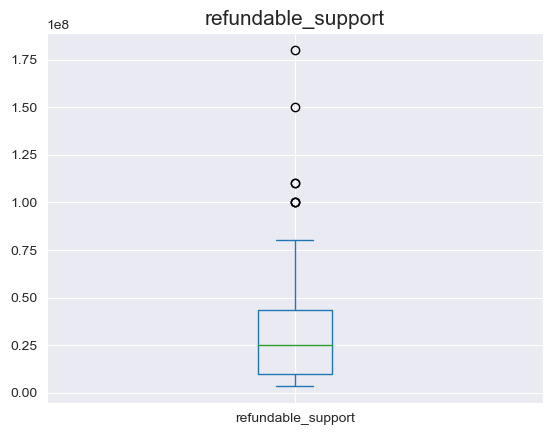

count          88.00
mean     63091233.50
std      74536340.78
min       5000000.00
25%      25000000.00
50%      35000000.00
75%      60000000.00
max     400000000.00
Name: nonrefundable_support, dtype: float64


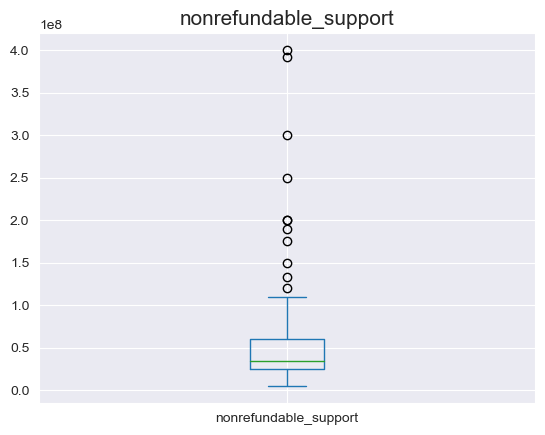

count           88.00
mean     218089143.80
std      292838516.08
min       31305313.00
25%       76735235.25
50%      129285000.00
75%      223453264.00
max     2305074303.00
Name: budget, dtype: float64


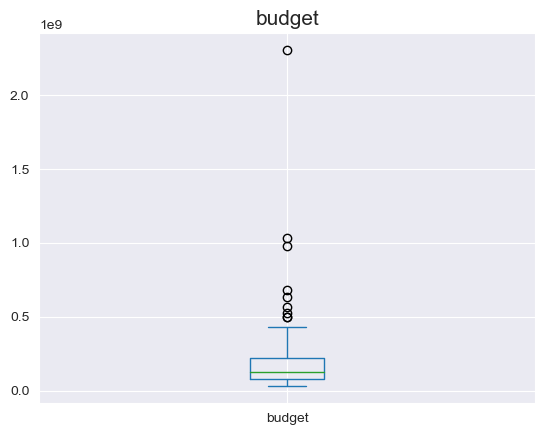

count   88.00
mean     5.89
std      1.28
min      2.80
25%      5.00
50%      6.00
75%      6.80
max      8.50
Name: ratings, dtype: float64


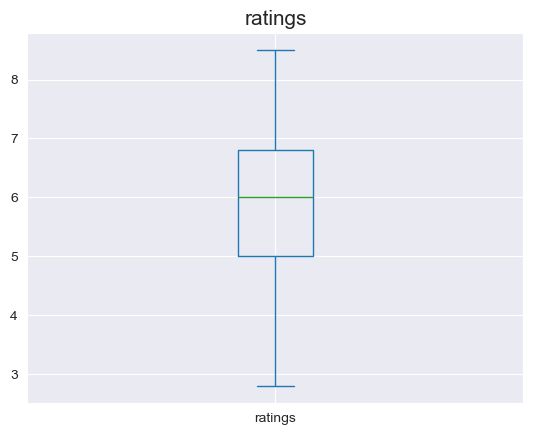

count           88.00
mean     235381573.66
std      470876234.59
min           9000.00
25%       17028106.72
50%       76434085.15
75%      244094267.88
max     3073568690.79
Name: box_office, dtype: float64


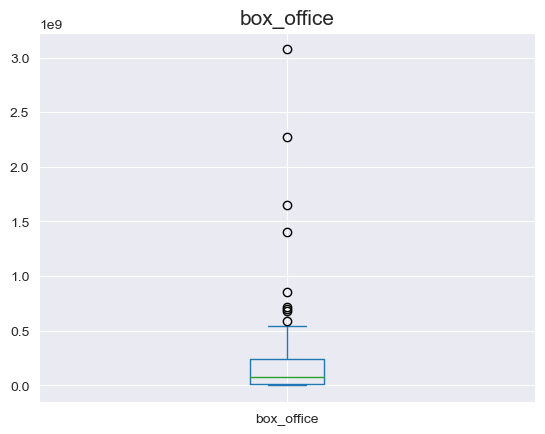

In [88]:
#посмотрим как распределились данные в столбцах с помощью диаграммы размаха
qwerty = df.query('(refundable_support > 0) & (nonrefundable_support > 0) & (budget > 0) & (ratings > 0) & (box_office > 0)')
for col in qwerty [['refundable_support','nonrefundable_support','budget','ratings','box_office']]:
    qwerty[col].plot(kind='box') 
    #qwerty[col].describe() почему то не работает
    plt.title(col, fontsize=15)
    print(qwerty[col].describe())
    plt.show()

count         111.00
mean     35486486.49
std      31972875.36
min       3500000.00
25%      15000000.00
50%      25000000.00
75%      50000000.00
max     180000000.00
Name: refundable_support, dtype: float64


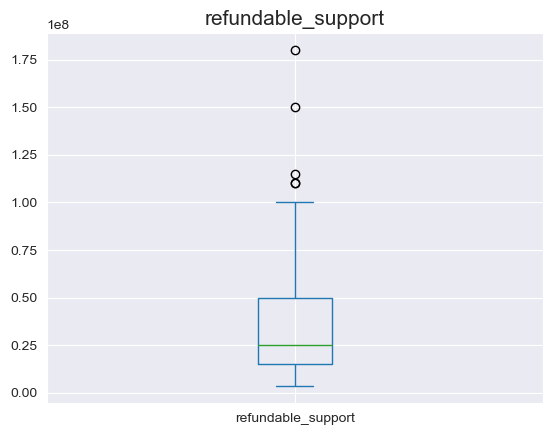

In [89]:
print(df.query('refundable_support > 0')['refundable_support'].describe())
df.query('refundable_support > 0')['refundable_support'].plot(kind='box')
plt.title('refundable_support', fontsize=15)
plt.show()

count         323.00
mean     50345784.25
std      60243206.31
min       3000000.00
25%      25000000.00
50%      30000000.00
75%      45000000.00
max     400000000.00
Name: nonrefundable_support, dtype: float64


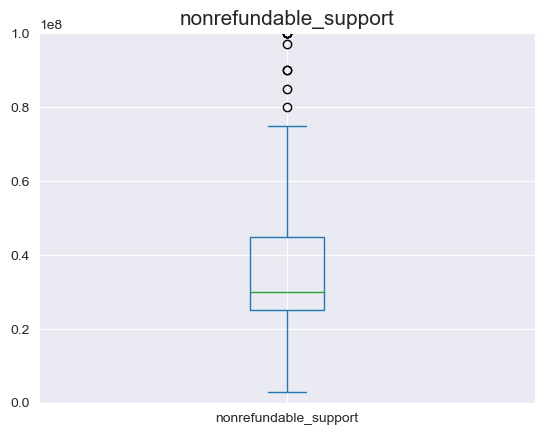

In [90]:
print(df.query('nonrefundable_support > 0')['nonrefundable_support'].describe())
df.query('nonrefundable_support > 0')['nonrefundable_support'].plot(kind='box',ylim=(0, 100000000))
plt.title('nonrefundable_support', fontsize=15)
plt.show()

count          315.00
mean     134096082.35
std      191226039.63
min       14462464.00
25%       46153866.50
50%       73379554.00
75%      150004286.50
max     2305074303.00
Name: budget, dtype: float64


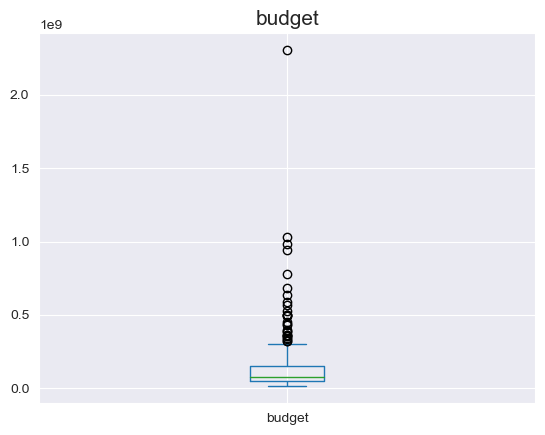

In [91]:
print(df.query('budget > 0')['budget'].describe())
df.query('budget > 0')['budget'].plot(kind='box')
plt.title('budget', fontsize=15)
plt.show()

count   6501.00
mean       6.48
std        1.10
min        1.00
25%        5.90
50%        6.60
75%        7.20
max        9.20
Name: ratings, dtype: float64


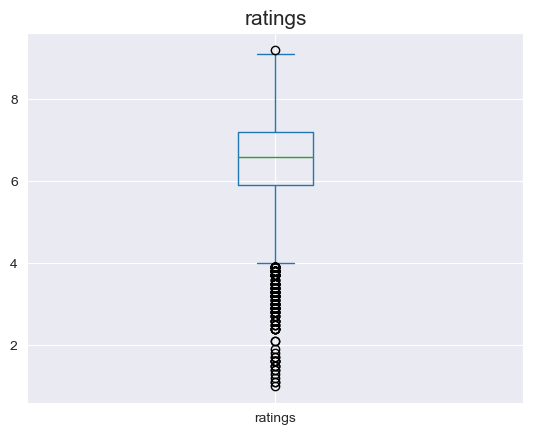

In [92]:
print(df.query('ratings > 0')['ratings'].describe())
df.query('ratings > 0')['ratings'].plot(kind='box')
plt.title('ratings', fontsize=15)
plt.show()

count         3135.00
mean      77058615.30
std      241139935.11
min             40.00
25%         102320.00
50%        2414891.00
75%       24638113.00
max     3073568690.79
Name: box_office, dtype: float64


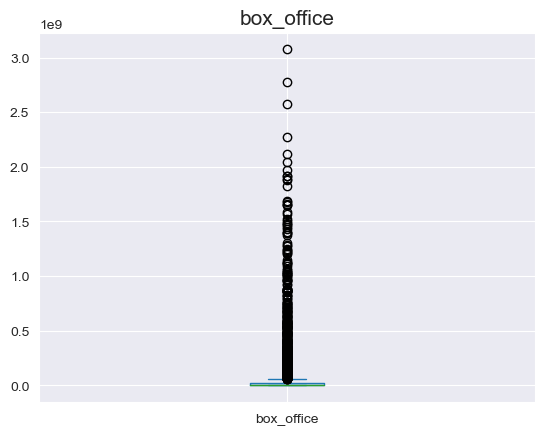

In [93]:
print(df.query('box_office > 0')['box_office'].describe())
df.query('box_office > 0')['box_office'].plot(kind='box')
plt.title('box_office', fontsize=15)
plt.show()

- Аномально высокие значения это не плохо, просто в данных присутствуют индивиды, которые отличаются от большей части данных, их тоже интересно изучить

**Возвратные средства**
- На диаграмме размаха видно, что возвратные средства выдаются до 100 млн.р
- Медианный объем возвратных средств составляет 25 млн.р
- Так же в данных присутствуют аномально высокие значения, максимальный размер возвратных средств 180 млн.р

**Невозвратные средства**
- На диаграмме размаха видно, что невозвратные средства выдаются до 80 млн.р
- Медианный объем невозвратных средств составляет 35 млн.р
- Невозвратных средств выдается больше чем возвратных
- Так же в данных присутствуют аномально высокие значения, максимальный объем невозвратных средств 400 млн.р

**Бюджет фильма**
- На диаграмме размаха видно, что бюджет фильма составляет около 500 млн.р
- Медианный бюджет фильма составляет 73 млн.р
- Так же в данных присутствуют аномально высокие значения, относительно общего распределения данных, так максимальный бюджет фильма составил 2 млрд.р

**Рейтинг**
- На диаграмме размаха видно, что рейтинг располагается в диапазоне до 10 баллов
- Медианный рейтинг фильма составляет 6.6, максимальный 9.2 балла

**Сборы фильма**
- На диаграмме размаха видно, что фильмы собирают до 100 млн.р
- Медианный объем сборов у фильма составляет 24 млн.р(Мне эта цифра кажется подозрительно маленькой)
- Так же в данных присутствуют аномально высокие значения, максимальные сборы у фильма больше 3 млрд.р

In [94]:
#срез, где бюджет меньше чем сумма возвратных и невозвратных средств
check_budget = df.query('budget < (refundable_support + nonrefundable_support)')

In [95]:
#срез строк с нужными столбцами
check_budget.iloc[:, [0, 11, 12]]

,title,budget,financing_source
2052,14+,0.00,"Министерство культуры, Фонд кино"
2057,Дуxless 2,0.00,Фонд кино
2471,Воин (2015),0.00,Фонд кино
2531,Бармен.,0.00,Фонд кино
2614,Савва. Сердце воина,0.00,Фонд кино
2683,Тряпичный союз,0.00,Фонд кино
2787,Срочно выйду замуж,0.00,Фонд кино
2873,Помню - не помню!,0.00,Министерство культуры
3046,Любовь с ограничениями,0.00,Фонд кино
3564,Притяжение (2016),0.00,Фонд кино


- Фильмов без бюджета не бывает, скорее всего пропуски полностью случайные, и всего 17 строк, думаю что на исследовании это не отразится

In [96]:
print('Доля пропущенных значений: {:.1%}'.format(len(check_budget) / len(df)))
print('Количество строк с ошибочным бюджетом:', len(check_budget))

Доля пропущенных значений: 0.2%
Количество строк с ошибочным бюджетом: 17


In [97]:
#посмотрим дубликаты
df.duplicated().sum()

0

In [98]:
#посмотрим дубликаты столбца
df['pu_number'].duplicated().sum()

2

In [99]:
#посмотрим дубликаты столбца
df['title'].duplicated().sum()

714

In [100]:
#посмотрим на строки-дубликаты
df[df['pu_number'].duplicated()]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00,художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,0.00,0.00,NaN,undefined,7.60,"драма,мелодрама,история",NaN
5067,Анализируй то!,221054410,2010-05-25 12:00:00,художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,0.00,0.00,NaN,undefined,6.80,"комедия,криминал",NaN


In [101]:
#посмотрим на строки-дубликаты
df[df['title'].duplicated()]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3,Особо опасен,221026916,2016-06-10 12:00:00,художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,0.00,NaN,undefined,6.80,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00,художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,0.00,NaN,undefined,6.80,"фантастика,боевик,триллер",NaN
41,Алекс и Эмма,221004616,2016-02-09 12:00:00,художественный,"Эскейп Артистс, Франчайз Пикчерз, Рейнер-Грэйс...",США,Роб Райнер,"Тодд Блэк, Элан Грейсман, Джереми Левен, Роб Р...",«16+» - для детей старше 16 лет,0.00,0.00,NaN,undefined,6.40,"мелодрама,комедия",NaN
110,Гарри Поттер и орден Феникса /По роману Дж.К.Р...,121026316,2016-09-23 12:00:00,художественный,"Уорнер Бразерс, Хэйдей Филмз",США - Великобритания,Дэвид Йетс,"Дэйвид Баррон, Дэйвид Хейман",«16+» - для детей старше 16 лет,0.00,0.00,NaN,undefined,7.70,"фэнтези,приключения,семейный",759526.00
113,Гарри Поттер и узник Азкабана /По роману Дж.К....,121026116,2016-09-23 12:00:00,художественный,"Хэйдей Филмз, 1492 Пикчерз, Уорнер Бразерс",США,Альфонсо Куарон,Майкл Барната,«12+» - для детей старше 12 лет,0.00,0.00,NaN,undefined,8.20,"фэнтези,приключения,семейный",1125302.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7368,Невиновен,111019319,2019-11-07 12:00:00,художественный,"ООО ""Кавказфильм""",Россия,А.Емкужев,"А.Емкужев, А.Хуажева, ООО ""Корпорация Русская ...",«16+» - для детей старше 16 лет,0.00,0.00,NaN,undefined,7.50,"триллер,детектив,криминал",NaN
7415,"Отель ""Гранд Будапешт""",121035119,2019-12-13 12:00:00,художественный,"Американ Эмпирикал, Индиан Пэинтбраш, Скотт Ру...","Германия, США",Уэс Андерсен,"Уэс Андерсон, Джереми Доусон, Стивен Рейлс",«16+» - для детей старше 16 лет,0.00,0.00,NaN,undefined,7.90,"комедия,приключения,детектив",NaN
7437,Зверь,121035919,2019-12-05 12:00:00,художественный,Студио энд Нью,Южная Корея,Ли Джон-хо,"Чан Гён-ик, Чон Джи-хун, Пэк Кён сук",«18+» - запрещено для детей,0.00,0.00,NaN,undefined,6.50,"триллер,драма",175003.51
7449,В тихом омуте,121036919,2019-12-09 12:00:00,художественный,"Хэд Гир Филмз, Крео Филмз, Локал Хироу, Метрол...",США,Адам Рэндолл,Мэтт Уолдек,«18+» - запрещено для детей,0.00,0.00,NaN,undefined,6.80,"триллер,криминал,детектив",NaN


In [102]:
#добавим год, месяц, день
df['year'] = df['show_start_date'].dt.year
df['month'] = df['show_start_date'].dt.month
df['week_day'] = df['show_start_date'].dt.weekday

In [103]:
#проверим
df.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,month,week_day
0,Открытый простор,221048915,2015-11-27 12:00:00,художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0.00,0.00,NaN,undefined,7.20,"боевик,драма,мелодрама",NaN,2015,11,4
1,Особо важное задание,111013716,2016-09-13 12:00:00,художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,undefined,«6+» - для детей старше 6 лет,0.00,0.00,NaN,undefined,6.60,"драма,военный",NaN,2016,9,1
2,Особо опасен,221038416,2016-10-10 12:00:00,художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,0.00,NaN,undefined,6.80,"фантастика,боевик,триллер",NaN,2016,10,0
3,Особо опасен,221026916,2016-06-10 12:00:00,художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,0.00,NaN,undefined,6.80,"фантастика,боевик,триллер",NaN,2016,6,4
4,Особо опасен,221030815,2015-07-29 12:00:00,художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.00,0.00,NaN,undefined,6.80,"фантастика,боевик,триллер",NaN,2015,7,2


In [104]:
#добавим 2 столбца где будет главный жанр фильма и имя и фамилия главного режиссера(которые написаны первыми)
df['dir_last_name'] = df['director'].apply(lambda x: x.split(',')[0])
df['general'] = df['genres'].apply(lambda x: x.split(',')[0])
#приведем к нижнему регистру и удалим начальные и конечные пробелы
df['dir_last_name'] = df['dir_last_name'].str.lower().str.strip() #

In [105]:
#прорверим
df.sample(15)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,year,month,week_day,dir_last_name,general
2505,Акт убийства,126001515,2015-05-25 12:00:00,прочие,"Финал Кат Фор Риал, Пирайа Фильм, Новая Земля,...",Дания - Норвегия - Великобритания,"Джошуа Оппенхаймер, Кристина Синн","Анне Кёнке, Синье Бридж Серенсен, Кристина Син...",«16+» - для детей старше 16 лет,0.00,...,NaN,undefined,7.50,"документальный,криминал,военный",NaN,2015,5,0,джошуа оппенхаймер,документальный
2409,Пятьдесят оттенков серого /По произведению Э.Л...,121030014,2014-12-30 12:00:00,художественный,"Фокус Фьючерз, Майкл Де Лука Продакшнз, Тригге...",США,Сэм Тейлор-Джонсон,"Дэна Брунетти, Э.Л.Джеймс, Майкл Де Лука",«18+» - запрещено для детей,0.00,...,NaN,undefined,4.40,мелодрама,963728813.50,2014,12,1,сэм тейлор-джонсон,мелодрама
3599,Истеричка (Hysterical),111010316,2016-06-17 12:00:00,художественный,Котт Анна Васильевна,Россия,А.Котт,А.Котт,«18+» - запрещено для детей,0.00,...,NaN,undefined,0.00,undefined,NaN,2016,6,4,а.котт,undefined
5494,Родные,126001017,2017-10-05 12:00:00,документальный,"435 Филмз, Балтик Филм Продакшн, Эго Медиа, Са...",Украина - Германия - Латвия - Эстония,Виталий Манский,"Симона Бауман, Марианна Каат, Наталья Манская,...",«12+» - для детей старше 12 лет,0.00,...,NaN,undefined,6.40,"комедия,драма",206188.00,2017,10,3,виталий манский,комедия
5276,Дамы и господа... The Rolling Stones. Мега-кон...,126000411,2011-03-25 12:00:00,прочие,Аншутц Интертейнмент Групп,США,"Стив Гебхардт, Боб Фриз",Аншутц Интертейнмент Групп,«0+» - для любой зрительской аудитории,0.00,...,NaN,undefined,0.00,undefined,NaN,2011,3,4,стив гебхардт,undefined
4273,Робин Гуд (Robin Hood),121007810,2010-04-23 12:00:00,художественный,"Юниверсал Пикчерз, Имэджин Интертейнмент, Риле...",Великобритания - США,Ридли Скотт,"Брайан Грейзер, Рассел Кроу, Ридли Скотт",«16+» - для детей старше 16 лет,0.00,...,NaN,undefined,7.20,"боевик,драма,приключения",2650.00,2010,4,4,ридли скотт,боевик
6154,Мир принадлежит тебе,121018618,2018-09-13 12:00:00,художественный,"Иконокласт, Чи-Фоу-Ми Продакшнз, Трибус Пи Фильм",Франция,Ромен Гаврас,"Шарль-Мари Антониоз, Мурад Белкеддар, Жан Дюам...",«18+» - запрещено для детей,0.00,...,NaN,undefined,5.90,"комедия,криминал",5129695.51,2018,9,3,ромен гаврас,комедия
2397,Фокус,221039915,2015-09-23 12:00:00,художественный,"Уорнер Бразерс, Ди Нови Пикчерз",США,"Гленн Фикарра, Джон Рекуа",Дениз Ди Нови,«18+» - запрещено для детей,0.00,...,NaN,undefined,7.10,"драма,мелодрама,комедия",NaN,2015,9,2,гленн фикарра,драма
4732,Темная вода /По мотивам романа Кодзи Сузуки/,221172110,2010-12-29 12:00:00,художественный,"Пост Но Биллс Филмз, Панденониум Продакшнз, Та...",США,Уолтер Саллес,"Дуг Дэвисон, Рой Ли, Билл Покорни",«16+» - для детей старше 16 лет,0.00,...,NaN,undefined,6.10,"ужасы,драма,детектив",NaN,2010,12,2,уолтер саллес,ужасы
6898,Валентина,112003919,2019-05-03 12:00:00,документальный,"ООО Кинокомпания ""Мастерская""",Россия,Д.Былинушкина,"С.Медведева, Ю.Медведева, М.Стрелкова, В.Черкашин",«12+» - для детей старше 12 лет,0.00,...,NaN,undefined,7.50,драма,NaN,2019,5,4,д.былинушкина,драма


In [106]:
#узнаем кол-во фильмов, которое сняли главные режиссеры
df['dir_last_name'].value_counts(ascending=False)

о.семёнова          60
стивен содерберг    17
д.червяцов          17
ридли скотт         16
тиль швайгер        14
                    ..
а.дамскер            1
брэдли кинг          1
акош барноцкий       1
и.триф               1
и.трусов             1
Name: dir_last_name, Length: 4597, dtype: int64

In [107]:
#посмотрим какие фильмы больше всего снял этот режиссер
df[df['dir_last_name'] == 'о.семёнова']

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,year,month,week_day,dir_last_name,general
2932,МУЛЬТ в кино. Выпуск № 32,114001516,2016-05-24 12:00:00,анимационный,"ООО ""Мульт в кино""",Россия,О.Семёнова,П.Смирнов,«0+» - для любой зрительской аудитории,0.00,...,NaN,undefined,0.00,undefined,5183871.00,2016,5,1,о.семёнова,undefined
3214,МУЛЬТ в кино. Выпуск № 36,114002816,2016-09-13 12:00:00,анимационный,"ООО ""Мульт в кино""",Россия,О.Семёнова,П.П.Смирнов,«0+» - для любой зрительской аудитории,0.00,...,NaN,undefined,0.00,undefined,3554233.10,2016,9,1,о.семёнова,undefined
3222,МУЛЬТ в кино. Выпуск № 50,114000517,2017-03-21 12:00:00,анимационный,"ООО ""Мульт в кино""",Россия,О.Семёнова,П.Смирнов,«0+» - для любой зрительской аудитории,0.00,...,NaN,undefined,3.90,"мультфильм,детский",NaN,2017,3,1,о.семёнова,мультфильм
3275,МУЛЬТ в кино. Выпуск № 48,114000317,2017-03-01 12:00:00,анимационный,"ООО ""Мульт в кино""",Россия,О.Семёнова,П.Смирнов,«0+» - для любой зрительской аудитории,0.00,...,NaN,undefined,3.90,"мультфильм,детский",NaN,2017,3,2,о.семёнова,мультфильм
3376,МУЛЬТ в кино. Выпуск № 35,114002316,2016-08-15 12:00:00,анимационный,"ООО ""Мульт в кино""",Россия,О.Семёнова,П.П.Смирнов,«0+» - для любой зрительской аудитории,0.00,...,NaN,undefined,0.00,undefined,4034973.50,2016,8,0,о.семёнова,undefined
3406,МУЛЬТ в кино. Выпуск № 51,114000717,2017-03-31 12:00:00,анимационный,"ООО ""Мульт в кино""",Россия,О.Семёнова,П.Смирнов,«0+» - для любой зрительской аудитории,0.00,...,NaN,undefined,0.00,undefined,NaN,2017,3,4,о.семёнова,undefined
3413,МУЛЬТ в кино. Выпуск № 44,114004416,2016-12-22 12:00:00,анимационный,"ООО ""Мульт в кино""",Россия,О.Семёнова,П.Смирнов,«0+» - для любой зрительской аудитории,0.00,...,NaN,undefined,0.00,undefined,1700.00,2016,12,3,о.семёнова,undefined
3414,МУЛЬТ в кино. Выпуск № 45,114004516,2016-12-23 12:00:00,анимационный,"ООО ""Мульт в кино""",Россия,О.Семёнова,П.Смирнов,«0+» - для любой зрительской аудитории,0.00,...,NaN,undefined,0.00,undefined,NaN,2016,12,4,о.семёнова,undefined
3429,МУЛЬТ в кино. Выпуск № 39,114003316,2016-10-20 12:00:00,анимационный,"ООО ""Мульт в кино""",Россия,О.Семёнова,П.П.Смирнов,«0+» - для любой зрительской аудитории,0.00,...,NaN,undefined,0.00,undefined,4723798.86,2016,10,3,о.семёнова,undefined
3453,МУЛЬТ в кино. Выпуск № 38,114003116,2016-10-12 12:00:00,анимационный,"ООО ""Мульт в кино""",Россия,О.Семёнова,П.П.Смирнов,«0+» - для любой зрительской аудитории,0.00,...,NaN,undefined,0.00,undefined,4692814.90,2016,10,2,о.семёнова,undefined


In [108]:
#сделаем очевидную замену пропущенных значений
df.loc[df['dir_last_name'] == 'о.семёнова', 'general'] = 'мультфильм'

In [109]:
#узнаем какую долю от общего бюджета составляет гос.поддержка
df['gos_ratio'] = (df['refundable_support'] + df['nonrefundable_support']) / df['budget'] 

In [110]:
#проверим
df[df['gos_ratio'] > 0]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,financing_source,ratings,genres,box_office,year,month,week_day,dir_last_name,general,gos_ratio
1281,Пока еще жива,111005313,2013-10-11 12:00:00,художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.00,...,Министерство культуры,8.10,"драма,мелодрама",365353.60,2013,10,4,а.атанесян,драма,0.33
1448,Бесславные придурки,111003314,2014-03-28 12:00:00,художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.00,...,Министерство культуры,0.00,undefined,28140.00,2014,3,4,а.якимчук,undefined,0.70
1498,Невидимки,111004213,2013-09-10 12:00:00,художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.00,...,Фонд кино,5.30,"комедия,фантастика",19957031.50,2013,9,1,р.давлетьяров,комедия,0.61
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00,художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.00,...,Министерство культуры,4.20,драма,55917.50,2014,5,0,е.миндадзе (псевдоним катя шагалова),драма,0.69
1792,Братья Ч,111004414,2014-04-23 12:00:00,художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.00,...,Министерство культуры,6.40,драма,232100.00,2014,4,2,м.угаров,драма,0.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7463,Союз спасения,111022019,2019-12-26 12:00:00,художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,100000000.00,...,Фонд кино,6.00,"история,биография,драма",717703185.53,2019,12,3,а.кравчук,история,0.51
7465,Иван Царевич и Серый Волк 4,114005019,2019-12-20 12:00:00,анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,100000000.00,...,Фонд кино,6.70,"мультфильм,приключения,семейный",501069235.00,2019,12,4,д.шмидт,мультфильм,0.53
7473,Вторжение,111022519,2019-12-23 12:00:00,художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,100000000.00,...,Фонд кино,5.70,"фантастика,боевик",NaN,2019,12,0,ф.бондарчук,фантастика,0.53
7475,Я свободен,111023019,2019-12-26 12:00:00,художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.00,...,Министерство культуры,5.90,драма,NaN,2019,12,3,и.северов,драма,0.65


In [111]:
df['gos_ratio'].describe()

count   332.00
mean       inf
std        NaN
min       0.04
25%       0.38
50%       0.61
75%       0.66
max        inf
Name: gos_ratio, dtype: float64

In [112]:
#заменим значения бесконечности на NaN
df['gos_ratio'] = df['gos_ratio'].replace(float('inf'), np.nan)

In [113]:
#проверим
df['gos_ratio'].describe()

count   315.00
mean      0.52
std       0.17
min       0.04
25%       0.37
50%       0.59
75%       0.66
max       0.78
Name: gos_ratio, dtype: float64

## 3. Исследовательский анализ данных

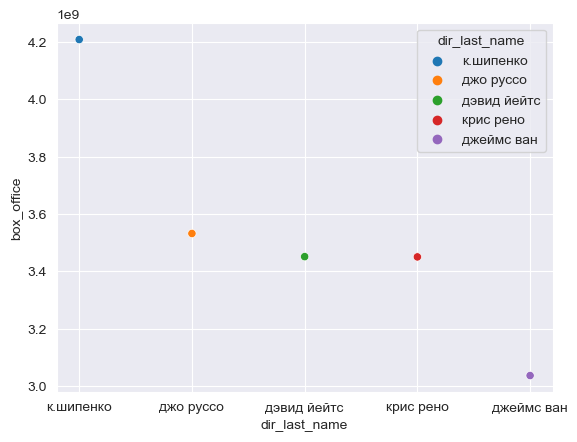

In [114]:
#посмотрим на топ 5 главных режиссеров, с самыми большими сборами
box_gen_dir = (df
    .pivot_table(index='dir_last_name', values='box_office', aggfunc='sum')
    .sort_values(by='box_office', ascending=False)
    .head()
)
sns.scatterplot(data=box_gen_dir, x='dir_last_name', y='box_office', hue='dir_last_name')
sns.set_style('whitegrid')
plt.show()

- 5 главных режиссеров с самыми большими сборами:
1. К.Шипенко(около 4.2млрд.р)
2. Джо Руссо(около 3.6млрд.р)
3. Дэвид Йейтс(около 3.5млрд.р)
4. Крис Рено(около 3.5млрд.р)
5. Джеймс Ван(около 3+ млрд.р)

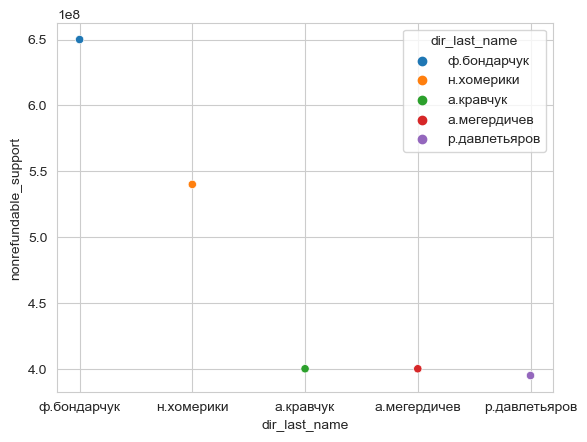

In [115]:
#посмотрим на топ 5 главных режиссеров, которые получили больше всего невозвратных средств
box_nonref = (df
    .pivot_table(index='dir_last_name', values='nonrefundable_support', aggfunc='sum')
    .sort_values(by='nonrefundable_support', ascending=False)
    .head()
)
sns.scatterplot(data=box_nonref, x='dir_last_name', y='nonrefundable_support', hue='dir_last_name')
plt.show()

- 5 5 главных режиссеров, которые получили больше всего невозвратных средств:
1. Ф.Бондарчук(650 млн.р) 
2. Н.Хомерики(около 550 млн.р)
3. А.Кравчук(около 400 млн.р)
4. А.Мегердичев(около 400 млн.р)
5. Р.Давлетьяров(чуть менее 400 млн.р)

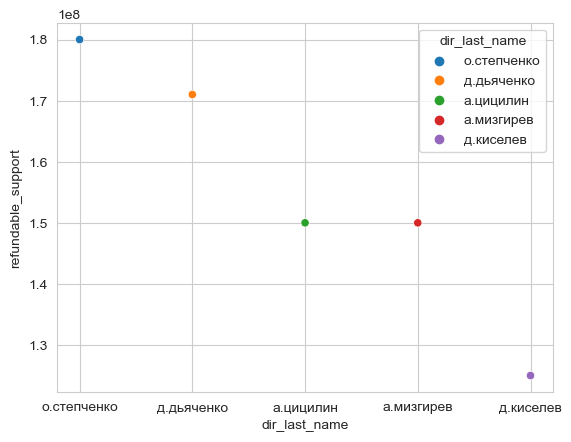

In [116]:
#посмотрим на топ 5 главных режиссеров, которые получили больше всего возвратных средств
box_ref = (df
    .pivot_table(index='dir_last_name', values='refundable_support', aggfunc='sum')
    .sort_values(by='refundable_support', ascending=False)
    .head()
)
sns.scatterplot(data=box_ref, x='dir_last_name', y='refundable_support', hue='dir_last_name')
plt.show()

- 5 главных режиссеров, которые получили больше всего возвратных средств:
1. О.Степченко (182 млн.р) 
2. Д.Дьяченко(чуть более 170 млн.р)
3. А.Цицилин(150 млн.р)
4. А.Мизгирев(чуть менее 150 млн.р)
5. Д.Киселев(менее 130 млн.р)

<div class="alert alert-success">
<b> Комментарий ревьюера ✅ </b>
    
Очень хорошо, что ты провел это дополнительное исследование и посмотрел на самых кассовых режиссеров и тех, которые используют максимальные объемы государственных средств.
    
Но лучше сначала выполнить основные исследования, а потом переходить к дополнительным, разделять проект на подпункты, объединяя в них однотипные действия — это сделает твой проект более цельным и создаст структуру.
    
</div>

<div class="alert alert-info">
<b> Комментарий студента V1:</b>

Хорошо, учтено
</div>

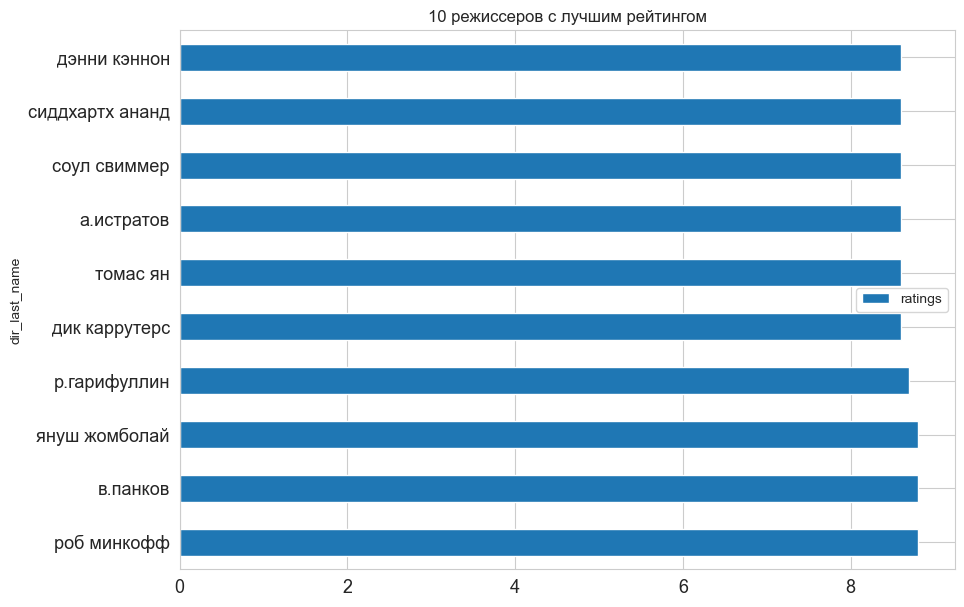

In [117]:
#посмотрим на топ 10 режиссеров с лучшим рейтингом
box_rating = (df
    .pivot_table(index='dir_last_name', values='ratings', aggfunc='median')
    .sort_values(by='ratings', ascending=False)
    .head(10)
    .plot(kind='barh', figsize=(10, 7), fontsize=13, ylim=(0, 12))
)
plt.title('10 режиссеров с лучшим рейтингом')
plt.show()
#sns.scatterplot(data=box_rating, x='dir_last_name', y='ratings', hue='dir_last_name')

<div class="alert alert-success">
<b> Комментарий ревьюера ✅ </b>

1. Можно добавить название и подписать оси, используя библиотеку `matplotlib`:
    
    `plt.title('Название гистограммы')`
    
    `plt.xlabel('Подпись оси x')`
    
    `plt.ylabel('Подпись оси y')`

1. Еще у этого графика не очень удобно читать названия категорий. Можно сделать график горизонтальным, указать параметр `kind = 'barh'`.
    
    Либо, используя библиотеку `matplotlib`, наклонить подписи оси x:
    
    `plt.xticks(rotation = 45)`

    Параметру `rotation` надо задать угол наклона в градусах.    

</div>

- 10 главных режиссеров с лучшим рейтингом(считали по медиане):
1. Роб Миникоф 
2. В.Панков 
3. Януш Жомболай
4. Р.Гарифуллин
5. Дик Каррутерс
6. Томас Ян
7. А.Истратов
8. Соул Свиммер
9. Сидхартх Анад
10. Дэнни Кэнон
- У всех режиссеров рейтинг более 8 и отличается незначительно

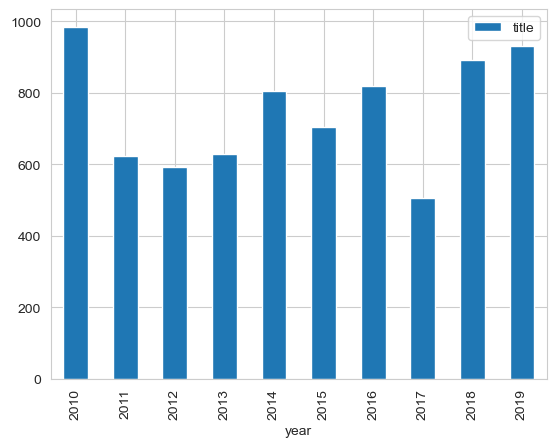

In [118]:
#создадим сводную таблицу, где индексом будет год, значением будет кол-во выпущенных фильмом за каждый год
films_year = df.pivot_table(index='year', values='title', aggfunc='count').sort_values(by='year')
films_year.plot(kind='bar', grid=True)
plt.show()

In [119]:
films_year.describe()

,title
count,10.00
mean,748.50
std,160.81
min,505.00
25%,624.00
50%,755.50
75%,872.75
max,985.00


Text(0.5, 1.0, 'Количество выпущенных фильмов каждый год')

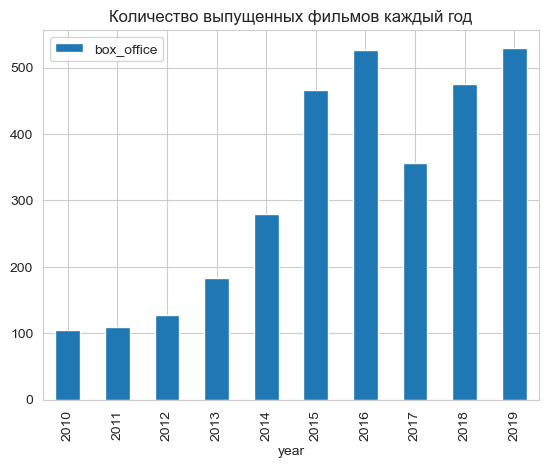

In [120]:
#создадим сводную таблицу, где индексом будет год, значением будет кол-во сборов за каждый год 
films_box = df.pivot_table(index='year', values='box_office', aggfunc='count').sort_values(by='year')
films_box.query('box_office > 0').sort_values(by='year').plot(kind='bar', grid=True)
plt.title('Количество выпущенных фильмов каждый год')

In [121]:
films_box.describe()

,box_office
count,10.00
mean,315.90
std,176.66
min,105.00
25%,142.00
50%,318.00
75%,472.75
max,530.00


- В среднем выпускается 315 фильмов ежегодно
- Больше всего фильмов выпущено в 2019 году
- Меньше всего фильмов выпущено в 2010 году

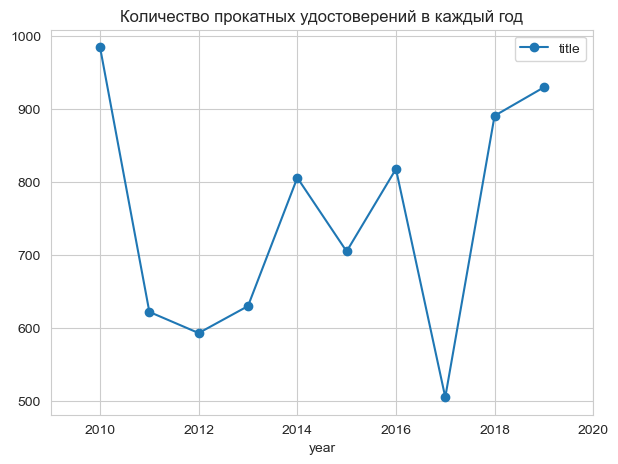

In [122]:
(films_year
 .sort_values(by='year', ascending=False)
 .plot(y='title', style='o-', grid=True, xlim=(2009, 2020), figsize=(7, 5))
)
plt.title('Количество прокатных удостоверений в каждый год')
plt.show()

- Прокатное удостоверение - документ, дающий право на прокат (демонстрацию) фильма на территории Российской Федерации, а также на его тиражирование и распространение, в том числе по кабельным или эфирным каналам
- Каждый год выпускается разное количество прокатных удостоверений. В среднем это 750 фильмов в год.
1. Больше всего прокатных удостоверений в 2010 году(985)
2. Меньше всего прокатных удостоверений в 2017 году(505)
- Тенденций здесь выделить не могу, поэтому не получится сказать что с каждым годом выпускается больше или меньше

- Прокатных удостоверений каждый год выдается больше, чем выпускается фильмов

In [123]:
#кореляция очень слабая между годом и суммой сборов
print(round(df['year'].corr(df['box_office']), 2))

0.14


In [124]:
#добавим столбец с долей выпущенных фильмов по годам в процетах и оеруглим до 2х знаков после запятой
films_year['ratio'] = round(films_year['title'] / len(df) * 100, 2)

In [125]:
films_year.sort_values(by='ratio').head()

,title,ratio
year,,
2017,505,6.75
2012,593,7.92
2011,622,8.31
2013,630,8.42
2015,705,9.42


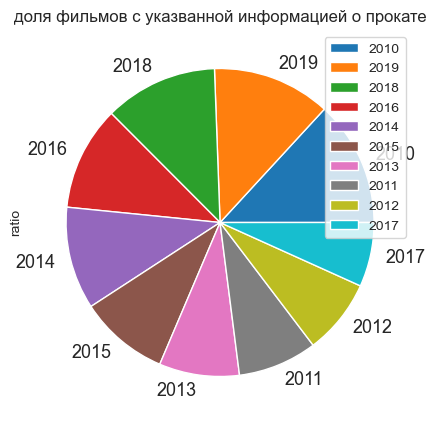

In [126]:
#доля фильмов с указванной информацией о прокате
films_year.sort_values(by='ratio', ascending=False).plot(y='ratio', kind='pie', grid=True, figsize=(10, 5), fontsize=13)
plt.title('доля фильмов с указванной информацией о прокате')
plt.show()

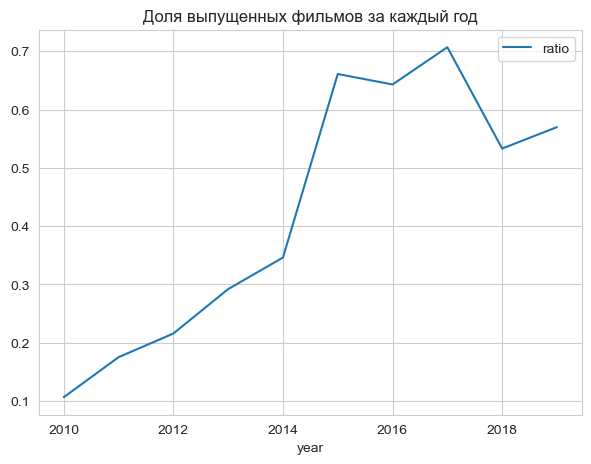

In [127]:
#Посчитаем, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах
films_box_ratio = df.pivot_table(index='year', values=['box_office', 'pu_number'], aggfunc='count')
films_box['ratio'] = films_box_ratio['box_office'] / films_box_ratio['pu_number']
films_box['ratio'].plot(kind='line', y='ratio', legend=True, figsize=(7, 5))
plt.title('Доля выпущенных фильмов за каждый год')
plt.show()

- Больше всего представлен период с 2014-2017
- Меньше всего представлен период с 2010-2013
- Больше всего доля выпущенных фильмов в 2017
- Меньше всего доля выпущенных фильмов в 2010

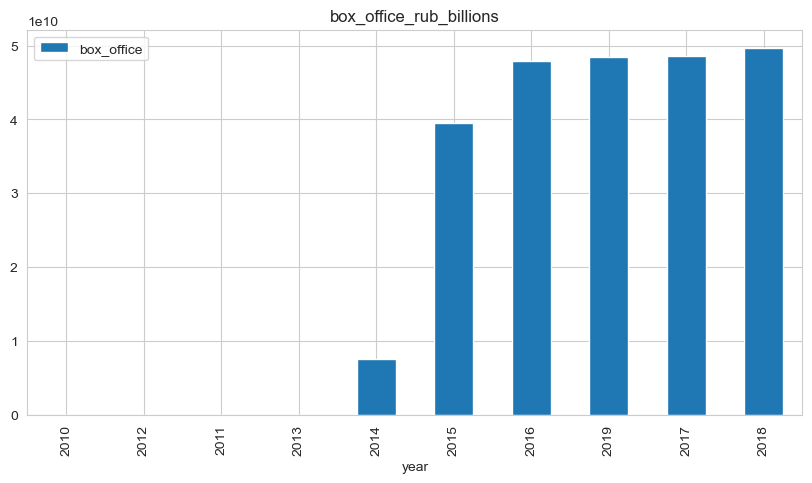

In [128]:
#создадим сводную таблицу, где индексом будет год, значением будет сумма сборов за этот год
box = (df
       .pivot_table(index='year', values='box_office', aggfunc='sum')
       .sort_values(by='box_office')
       .plot(kind='bar', grid=True, figsize=(10, 5), title='box_office_rub_billions')
      )

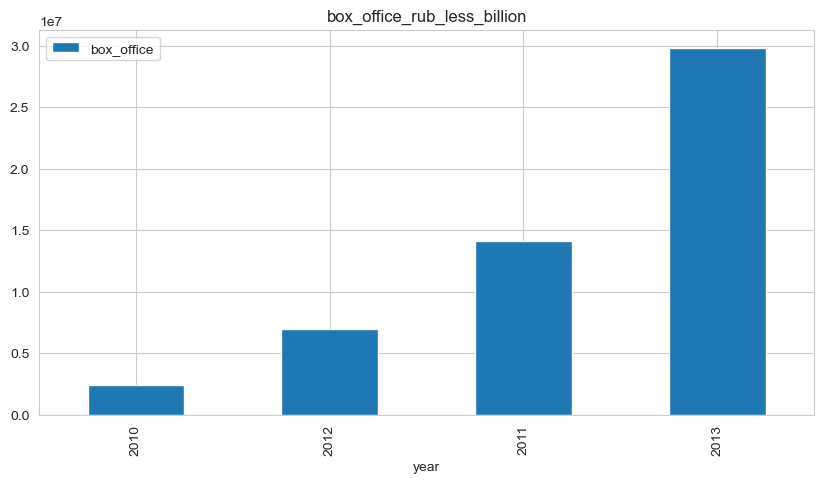

In [129]:
#посмотрим как распределились года, которые собрали меньше миллиарда
box_bil = (df
           .pivot_table(index='year', values='box_office', aggfunc='sum')
           .query('box_office <=1000000000')
           .sort_values(by='box_office')
           .plot(kind='bar', grid=True, figsize=(10, 5), title='box_office_rub_less_billion')
          )

In [130]:
#создадим сводную таблицу со средними и медианными сборами
box_mean_median = df.pivot_table(index='year', values='box_office', aggfunc=['mean', 'median'])
box_mean_median.columns =['mean', 'median']

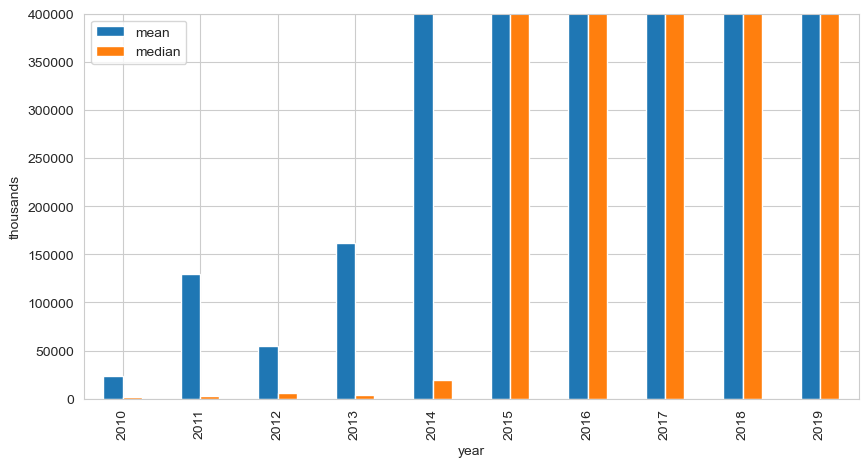

In [131]:
#посмотрим на среднее и медианное распределение сборов по годам
box_mean_median.plot(kind='bar', grid=True, figsize=(10, 5), ylim=(0, 400000), xlim=(2010, 2020))
plt.ylabel('thousands')
plt.show()

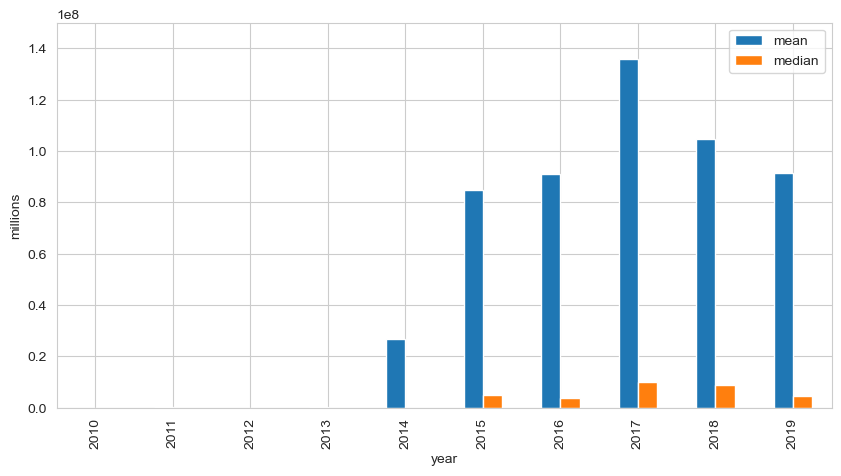

In [132]:
#посмотрим на большие средние сборы
box_mean_median.plot(kind='bar', grid=True, figsize=(10, 5), ylim=(0, 150000000), xlim=(2010, 2020))
plt.ylabel('millions')
plt.show()

In [133]:
box_mean_median.head(10).round().sort_values(by='mean')

,mean,median
year,,
2010,23130.00,1700.00
2012,54339.00,5660.00
2011,129383.00,3000.00
2013,161955.00,3522.00
2014,26887250.00,19610.00
2015,84763543.00,4864744.00
2016,91000570.00,3846679.00
2019,91369262.00,4627798.00
2018,104565059.00,8891102.00


- Возможно сборы с 2010-2013 указаны в долларах или ошибка в данных
- Самые большие средние сборы в 2017 году

In [134]:
#создадим сводную таблицу, где индексами будет год и возрастная категория, значением сумма сборов для каждого года по категории
age = df.query('year >= 2015').pivot_table(index=['year', 'age_restriction'], values='box_office', aggfunc='sum')

In [135]:
#отсортируем в порядке возрастания по сборам
age.sort_values(by='box_office')

box_office
year age_restriction                                      
2019 «0+» - для любой зрительской аудитории    17746066.82
2018 «0+» - для любой зрительской аудитории    32449002.11
2016 «0+» - для любой зрительской аудитории   150228848.67
2017 «0+» - для любой зрительской аудитории   229598930.00
2015 «0+» - для любой зрительской аудитории   379054578.37
     «18+» - запрещено для детей             5432308367.44
2016 «18+» - запрещено для детей             6793929818.87
2017 «12+» - для детей старше 12 лет         7851427660.67
2015 «6+» - для детей старше 6 лет           8701799371.41
2018 «18+» - запрещено для детей             8760085501.15
2017 «18+» - запрещено для детей             9651495581.02
2018 «6+» - для детей старше 6 лет          10104974623.41
2019 «18+» - запрещено для детей            10121796303.64
2015 «16+» - для детей старше 16 лет        11370566590.57
2016 «6+» - для детей старше 6 лет          12053146008.24
2017 «6+» - для детей старше 6 лет          12086142145.76
2016 «12+» - для детей старше 12 лет        12204446524.39
2019 «12+» - для детей старше 12 лет        12680198773.67
     «16+» - для детей старше 16 лет        12753418984.60
     «6+» - для детей старше 6 лет          12852548650.86
2015 «12+» - для детей старше 12 лет        13616082008.91
2018 «12+» - для детей старше 12 лет        14267291660.69
     «16+» - для детей старше 16 лет        16503602346.96
2016 «16+» - для детей старше 16 лет        16664548541.74
2017 «16+» - для детей старше 16 лет        18745042900.06

<AxesSubplot:xlabel='year,age_restriction'>

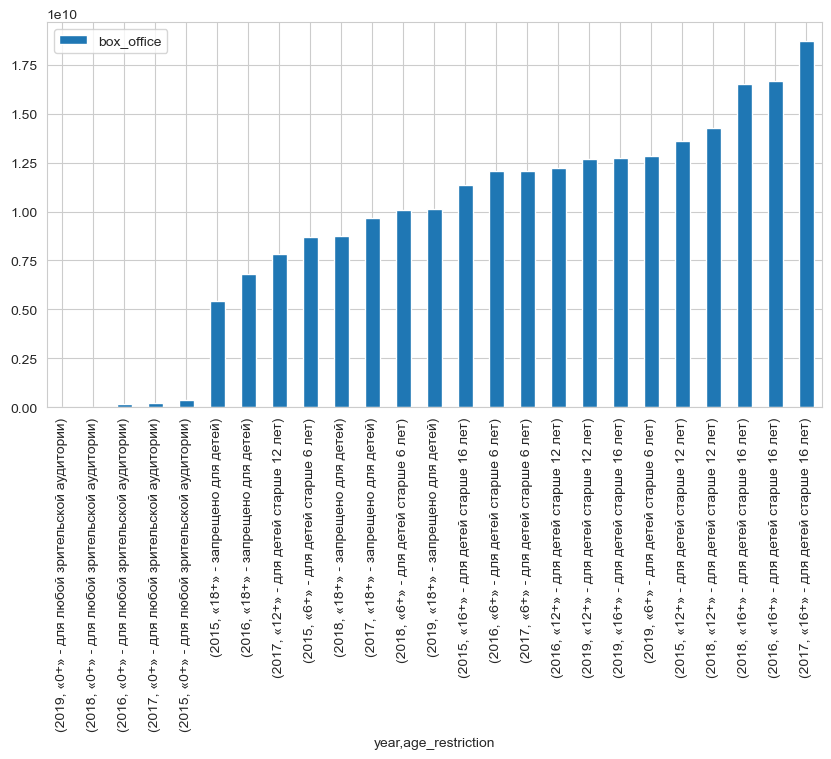

In [136]:
#посмотрим через столбчатые диаграммы
age.sort_values(by='box_office').plot(kind='bar', figsize=(10, 5))

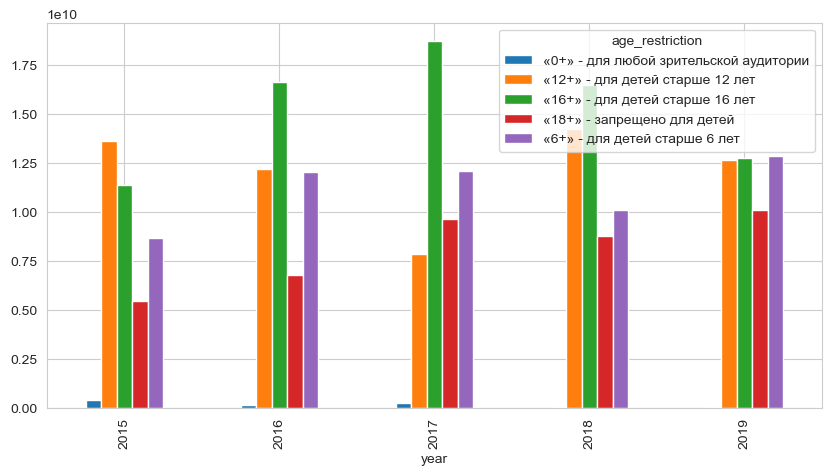

In [137]:
(age
 .pivot_table(index='year',columns = 'age_restriction',values = 'box_office', aggfunc = 'sum')
 .plot(kind='bar', figsize=(10, 5))
)
plt.show()

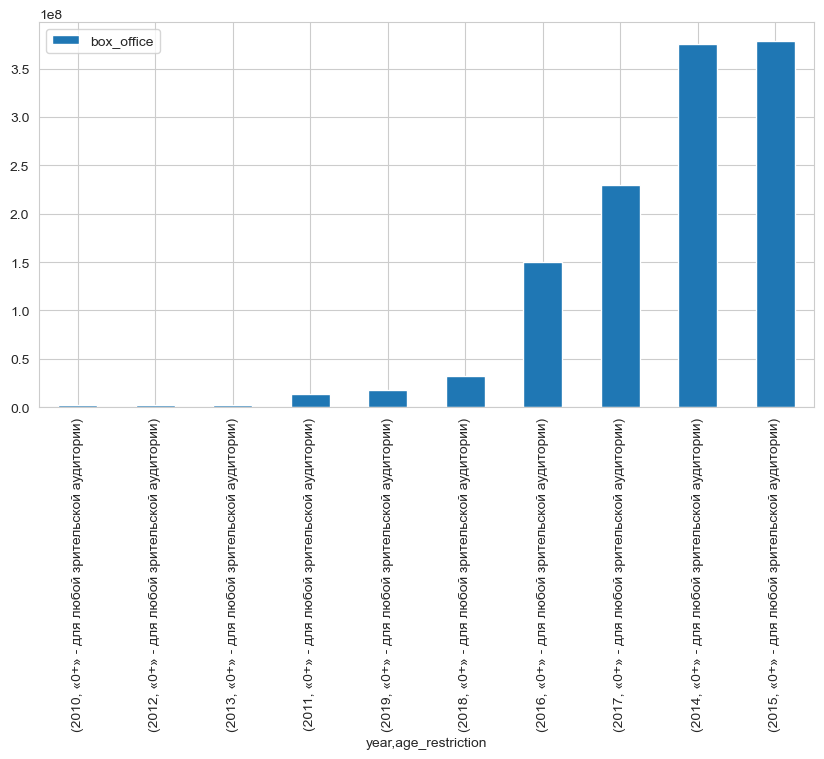

In [138]:
#посмотрим на сборы каждой категории отдельно (0+)
zero_df = (df
        .query('age_restriction == "«0+» - для любой зрительской аудитории"')
        .pivot_table(index=['year', 'age_restriction'], values='box_office', aggfunc='sum')
        .sort_values(by='box_office')
        .plot(kind='bar', figsize=(10, 5))
)

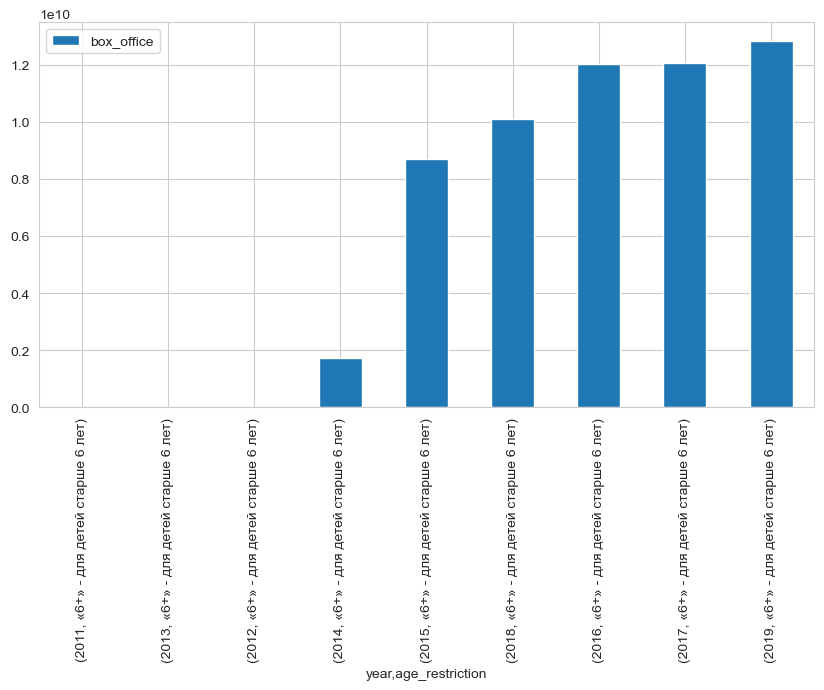

In [139]:
#посмотрим на сборы каждой категории отдельно (6+)
six_df = (df
        .query('age_restriction == "«6+» - для детей старше 6 лет"')
        .pivot_table(index=['year', 'age_restriction'], values='box_office', aggfunc='sum')
        .sort_values(by='box_office')
        .plot(kind='bar', figsize=(10, 5))
)

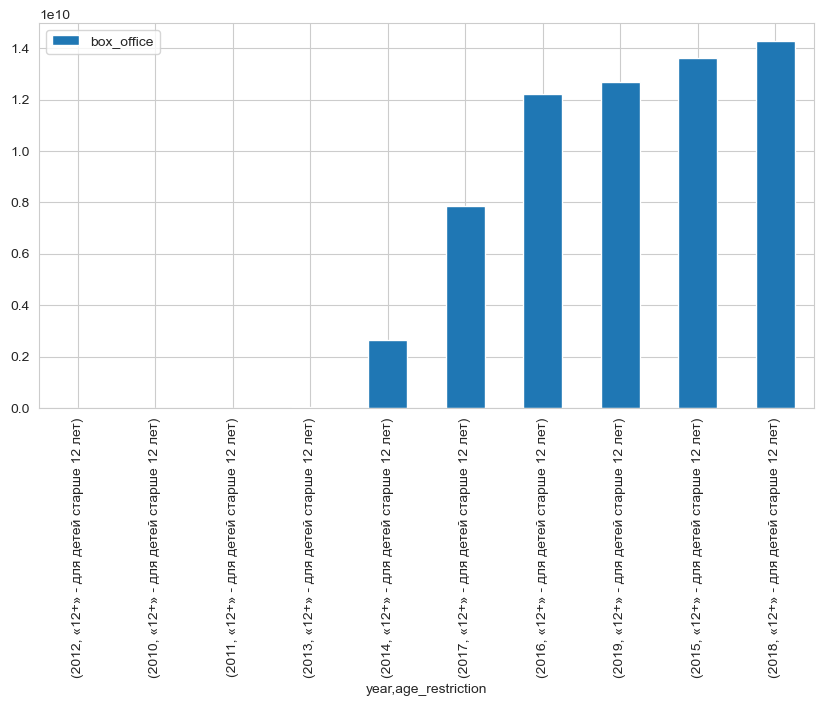

In [140]:
#посмотрим на сборы каждой категории отдельно (12+)
twelve_df = (df
        .query('age_restriction == "«12+» - для детей старше 12 лет"')
        .pivot_table(index=['year', 'age_restriction'], values='box_office', aggfunc='sum')
        .sort_values(by='box_office')
        .plot(kind='bar', figsize=(10, 5))
)

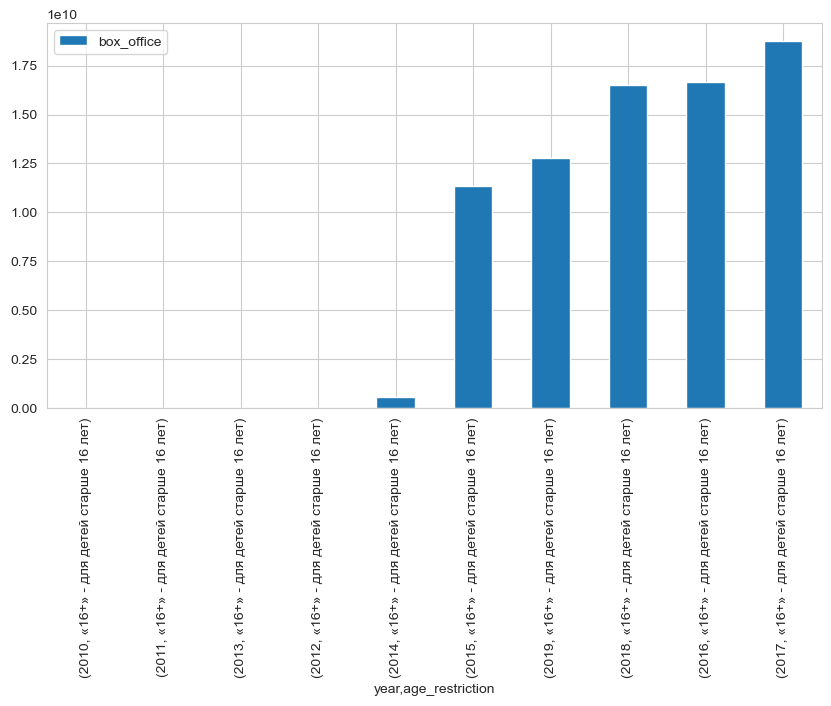

In [141]:
#посмотрим на сборы каждой категории отдельно (16+)
sixteen_df = (df
        .query('age_restriction == "«16+» - для детей старше 16 лет"')
        .pivot_table(index=['year', 'age_restriction'], values='box_office', aggfunc='sum')
        .sort_values(by='box_office')
        .plot(kind='bar', figsize=(10, 5) ) #ylim=(0, 1000000)
)

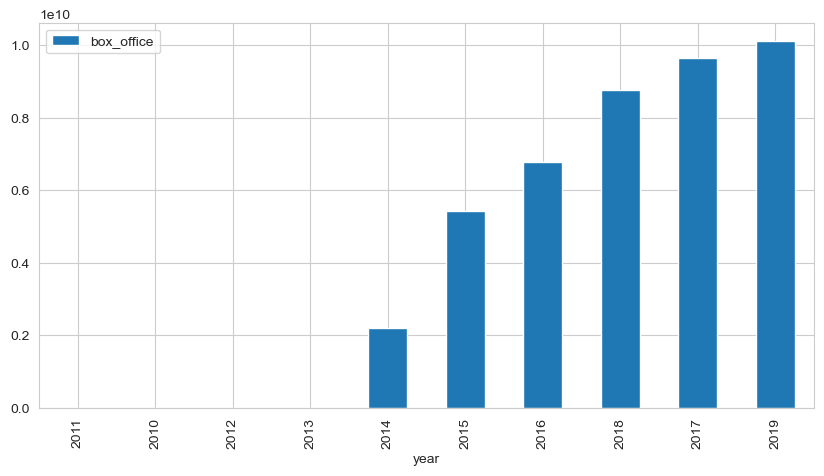

In [142]:
#посмотрим на сборы каждой категории отдельно (18+)
eighteen_df = (df
        .query('age_restriction == "«18+» - запрещено для детей"')
        .pivot_table(index='year', values='box_office', aggfunc='sum')
        .sort_values(by='box_office')
        .plot(kind='bar', figsize=(10, 5) ) #ylim=(0, 1000000)
)

**Вывод**
- С 2015-2019:
1. Меньше всего сборов у категории 0+ (2015-2019)
2. Больше всего сборов у категории 16 + (2016-2018)
- Стабильных тенденций не могу выделить, у каждой категории разный сборы в разные годы
- Почему 16+ собрала больше всех сложно сказать, возможно фильмы интересные выходили

- Средние значения так отличаются от медианных потому что они менее устойчивы к аномальным значениям, каждый год выпускалось разное количество фильмов и у каждого фильма разные сборы, один хороший фильм может собрать больше чем 3 средних, даже если в этот год выпущено меньше фильмов то в среднем сумма сборов будет больше

<AxesSubplot:xlabel='general'>

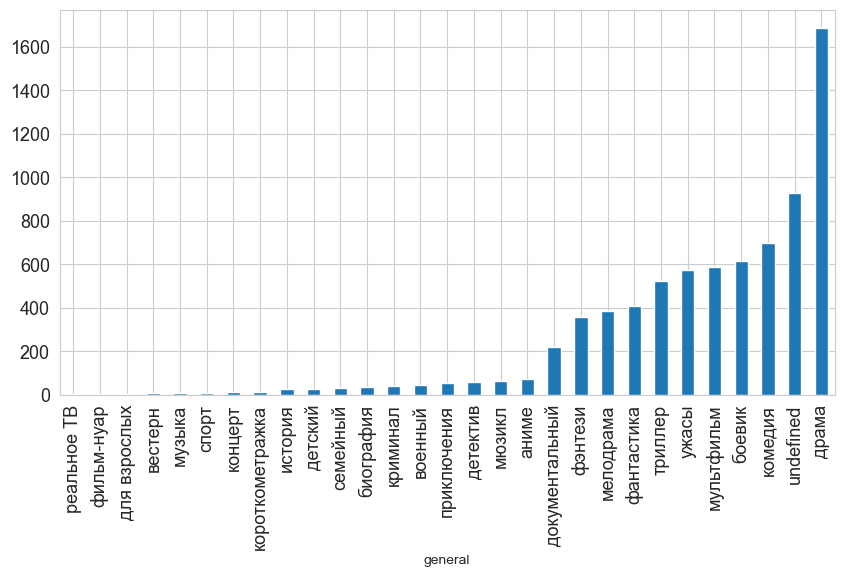

In [143]:
#посмотрим распределение популярности жанров
df.groupby('general')['pu_number'].count().sort_values().plot(kind='bar', figsize=(10, 5), fontsize=13)

- Самым популярным жанром оказалась драма, на втором месте пропущенные значения, их так много, что они попали в рейтинг, на 3 месте коммедия
- Вывод, люди любят поплакать и посмеяться)

In [144]:
popular_dir = df.pivot_table(index='dir_last_name', values='general', aggfunc='count')

<AxesSubplot:xlabel='dir_last_name'>

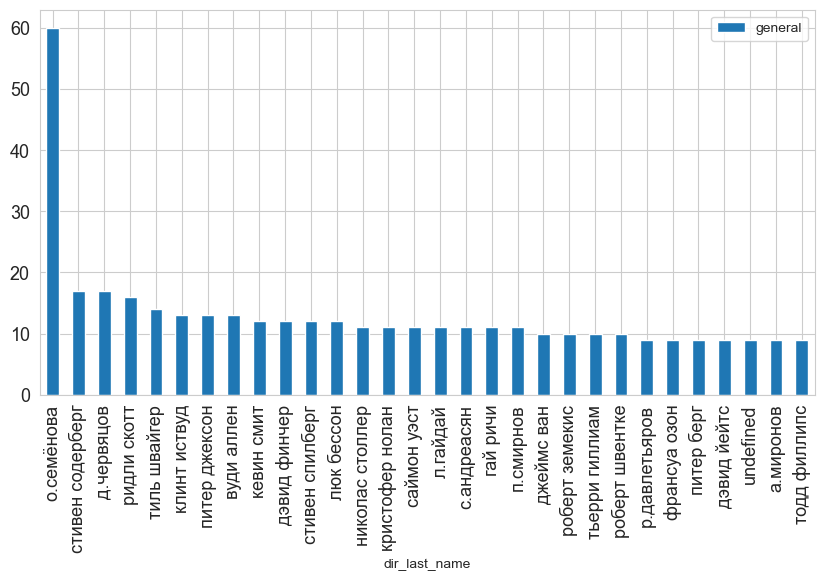

In [145]:
#посмотрим на топ 30 режиссеров в порядке убывания по кол-ву снятых фильмов
popular_dir.sort_values(by='general', ascending=False).head(30).plot(kind='bar', figsize=(10, 5), fontsize=13)

- Топ 30 главных режиссеров по кол-ву выпущенных фильмов:
1. О.Семенова(60 фильмов)
2. Стивен Содерберг(около 20 фильмов)
3. Д.Червяцов(около 20 фильмов)
4. Ридли Скотт(около 15 фильмов)
5. Тиль Швайгер(около 13 фильмов)
- Напоминаю, что данные с 2010-2019 годы


In [146]:
#сделаем срез по источникам финансирования
minkult_fond = df.query(
    '(financing_source == "Министерство культуры") | (financing_source == "Фонд кино") |  (financing_source == "Министерство культуры, Фонд кино")'
)

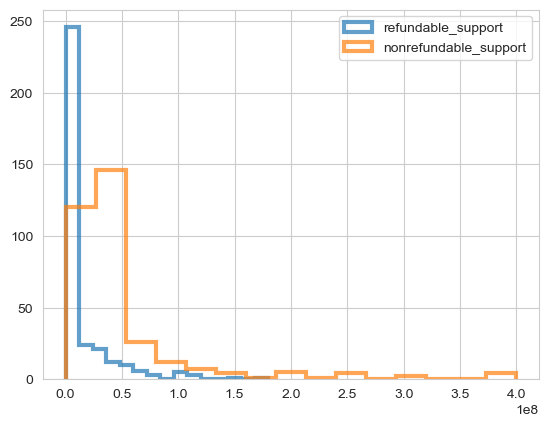

In [147]:
#построим гистограмму по возвратным средствам и невозвратным
ax = minkult_fond['refundable_support'].hist(histtype='step',linewidth=3, bins=15, alpha=0.7, legend=True)
minkult_fond['nonrefundable_support'].hist(
    histtype='step',
    bins=15,
    linewidth=3,
    alpha=0.7,
    ax=ax,
    grid=True,
    legend=True
)
plt.xlabel=('millions')

- По графику видно, что чаще, но меньше средств выдают на возвратной основе, реже и больше на безвозвратной основе 

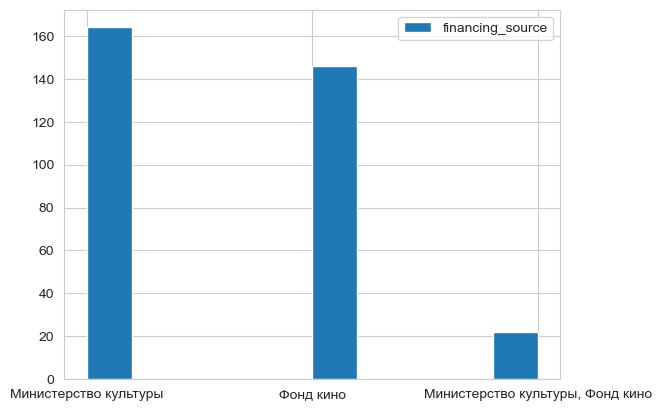

In [148]:
#узнаем кто чаще спонсирует фильмы
minkult_fond['financing_source'].hist(legend=True);

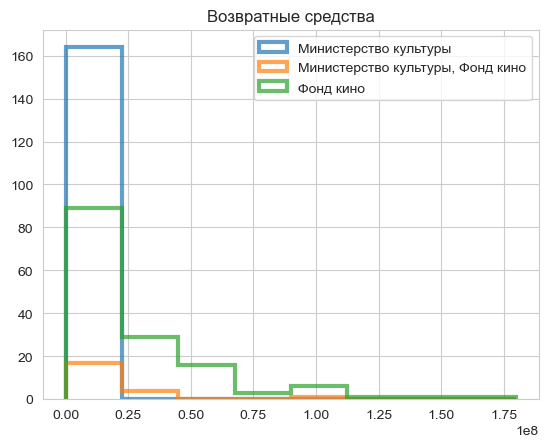

In [149]:
#построим гистограммы и узнаем кто больше и чаще выделяет возвратные средства
a = minkult_fond['refundable_support'].min()
b = minkult_fond['refundable_support'].max()
minkult_fond.groupby('financing_source')['refundable_support'].hist(
    legend=True, 
    range=(a, b), 
    histtype='step', 
    alpha=0.7,
    linewidth=3,
    bins=8)
plt.title('Возвратные средства')
plt.show()

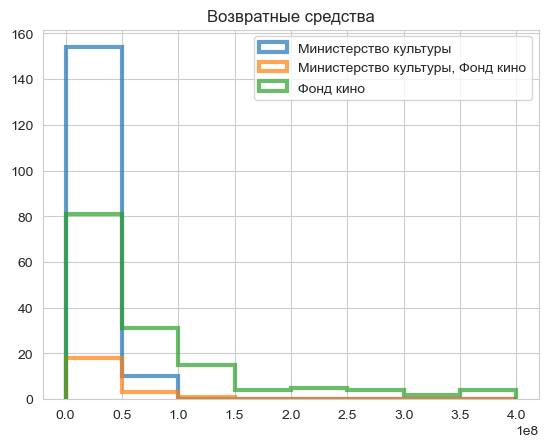

In [150]:
#построим гистограммы и узнаем кто больше и чаще выделяет НЕвозвратные средства
c = minkult_fond['nonrefundable_support'].min()
d = minkult_fond['nonrefundable_support'].max()
minkult_fond.groupby('financing_source')['nonrefundable_support'].hist(
    legend=True, 
    range=(c, d), 
    histtype='step', 
    alpha=0.7,
    linewidth=3,
    bins=8)
plt.title('Возвратные средства')
plt.show()

******

- **Возвратные средства**
1. Чаще, но меньше(объем денежный средств) возвратных средств выделяет Министерство культуры
2. Реже, но больше(объем денежный средств) возвратных средств выделяет Фонд кино
3. Реже и меньше(объем денежный средств) их совместного финансирования
- **Невозвратные средства**
1. Чаще, но меньше(объем денежный средств) невозвратных средств выделяет Министерство культуры
2. Реже, но больше(объем денежный средств) невозвратных средств выделяет Фонд кино
3. Реже и меньше(объем денежный средств) их совместного финансирования
- **Возвратные vs Невозвратные**
1. Министерство культуры чаще выделяет на безвозвратной основе
2. Фонд кино чаще выделяет на безвозвратной основе
3. Совместно финансируют чаще  на безвозвратной основе

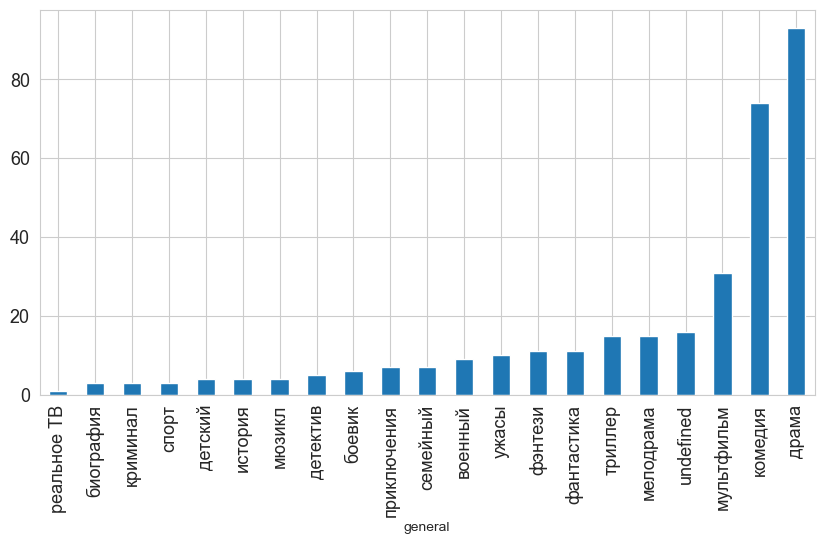

In [151]:
#посмотрим распределение какие жанры любят спонсировать
minkult_fond.groupby('general')['financing_source'].count().sort_values().plot(kind='bar', figsize=(10, 5), fontsize=13);

- Больше всего любят спонсировать:
1. Драмы
2. Комедии
3. Мультфильмы

In [152]:
#создадим столбец и узнаем какие фильмы окупаются, а какие нет  
df['pay_back'] = df['box_office'] - df['budget']

In [153]:
#посмотрим на столбец очень много пропущенных значений
value('pay_back')

Максимальное значение: 2913568690.79
Минимальное значение: -1971477243.41
Уникальное значение: 
[            nan -7.90465464e+07 -3.71147170e+07 -1.56066458e+08
 -4.05182225e+07 -3.97830220e+07 -3.67711414e+07  2.85783737e+07
 -8.14788275e+07  2.13252817e+08 -4.85195225e+07  4.12256338e+07
 -3.57052490e+07 -2.73413249e+07  6.10002755e+07 -6.86322038e+07
  1.02340161e+07  4.46163511e+08 -6.70587370e+07  1.53750457e+07
 -4.01330020e+07 -6.81798680e+07 -3.33434210e+07  2.70804462e+08
 -4.27421683e+08 -2.80058797e+07 -3.96652500e+07 -3.73514420e+07
 -3.44426155e+07 -4.29599500e+07  3.15942875e+08 -3.40440295e+07
 -4.96729610e+07 -5.78751900e+07 -1.79168851e+08 -3.71063070e+07
 -3.91308190e+07 -4.92194560e+07 -4.88889180e+07 -3.20322067e+07
 -2.31269788e+06  1.96572438e+08 -1.43612268e+08 -3.70648160e+07
 -3.56988670e+07 -2.57916000e+07 -3.79392020e+07 -6.55765215e+07
 -2.61753050e+07  6.74189748e+07 -3.88056560e+07 -9.69792965e+07
 -4.53738829e+07 -3.47368060e+07 -1.39213171e+08 -5.0023961

In [154]:
#создадим 2 среза в одном окупившиеся фильмы в другом нет
pay_back_minkult = df.query('financing_source == "Министерство культуры"')
pay_back_fond = df.query('financing_source == "Фонд кино"')

In [155]:
#сделаем срез по источникам финансирования
minkult_fond = df.query(
    '(financing_source == "Министерство культуры") | (financing_source == "Фонд кино") |  (financing_source == "Министерство культуры, Фонд кино")'
)

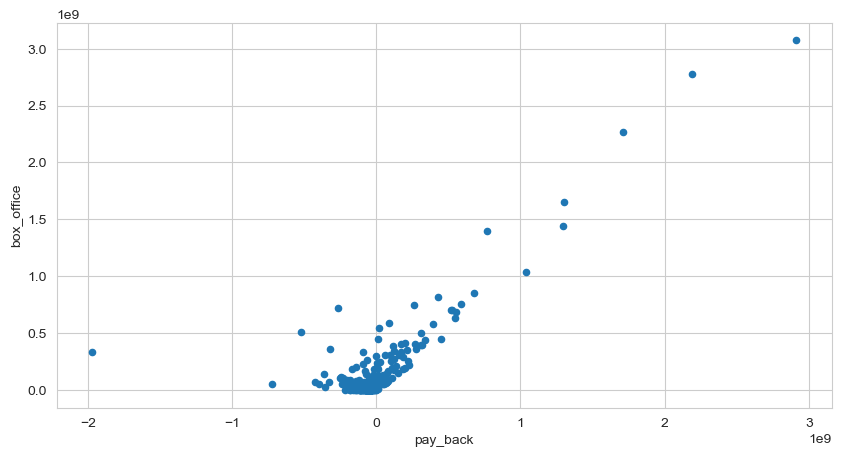

In [156]:
minkult_fond.plot(x='pay_back', y='box_office', kind='scatter', figsize=(10, 5),);

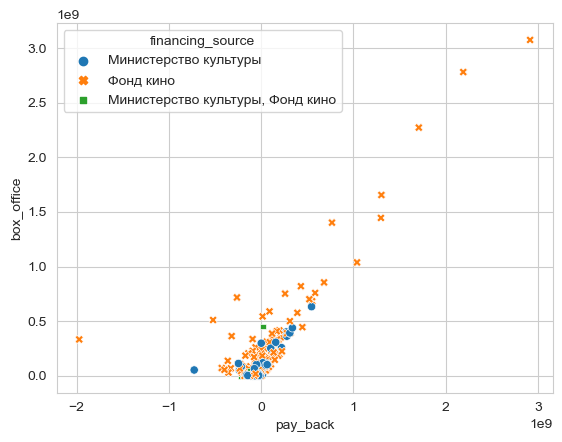

In [157]:
#посмотрим на окупаемость #сделаем срез по источникам финансирования
sns.scatterplot(data=minkult_fond, x='pay_back', y='box_office', hue='financing_source', style='financing_source')
sns.ylim=()

- На графике видно, что больше всего значений около 0, на границе с 0, за 0, это говорит о плохой окупаемости спонсируемых фильмов

In [158]:
#хорошая положительная корреляция, чем больше сборы, тем больше окупаемость
print(round(df['box_office'].corr(df['pay_back']), 2))

0.84


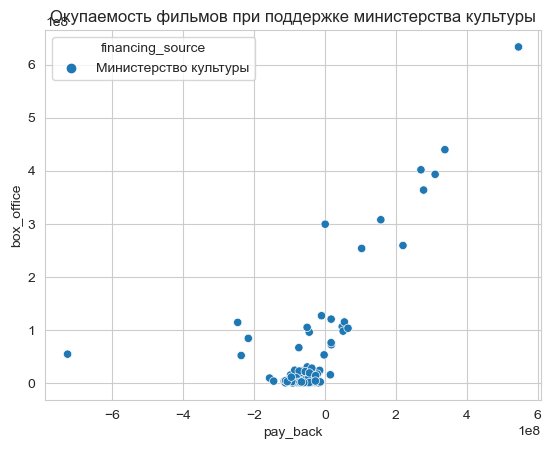

In [159]:
#посмотрим на окупаемость фильмов при поддержке министерства культуры
sns.scatterplot(data=pay_back_minkult, x='pay_back', y='box_office', hue='financing_source', style='financing_source')
sns.xlim=()
plt.title('Окупаемость фильмов при поддержке министерства культуры')
plt.show()

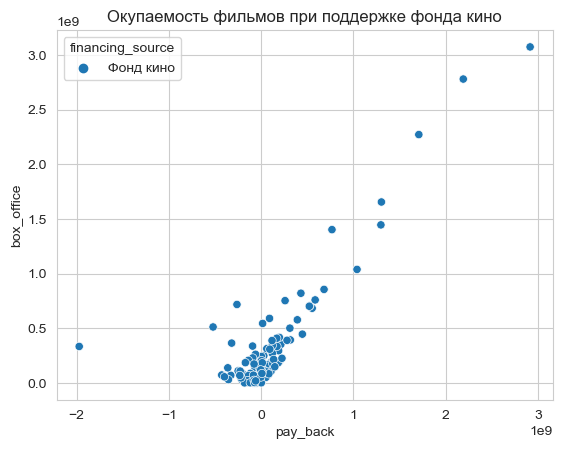

In [160]:
#посмотрим на окупаемость фильмов при поддержке фонда кино
sns.scatterplot(data=pay_back_fond, x='pay_back', y='box_office', hue='financing_source', style='financing_source')
sns.xlim=()
plt.title('Окупаемость фильмов при поддержке фонда кино')
plt.show()

In [161]:
print('Доля Мин_Культа равна: {:.1%}'.format((len(df[df['financing_source']== 'Министерство культуры']) / len(df))))
print('Доля Фонда Кино равна: {:.1%}'.format((len(df[df['financing_source']== 'Фонд кино']) / len(df))))

Доля Мин_Культа равна: 2.2%
Доля Фонда Кино равна: 2.0%


In [162]:
#срезы где финансовый источник минкульт и значения в столбце окупаемости больше 0, а в другом меньше 0
non_zero = df.query('(financing_source == "Министерство культуры") & (pay_back > 0)')
zero = df.query('(financing_source == "Министерство культуры") & (pay_back < 0)')

In [163]:
#посчитаем долю окупившихся фильмов и неокупившихся(разделим фильмы которые окупились на)
print('Доля окупившихся фильмов Министерства Культуры равна: {:.1%}'.format((len(non_zero[non_zero['financing_source']== 'Министерство культуры']) / len(df[df['financing_source']== 'Министерство культуры']))))
print('Доля не окупившихся фильмов Министерства Культуры равна: {:.1%}'.format((len(zero[zero['financing_source']== 'Министерство культуры']) / len(df[df['financing_source']== 'Министерство культуры']))))

Доля окупившихся фильмов Министерства Культуры равна: 10.4%
Доля не окупившихся фильмов Министерства Культуры равна: 82.3%


In [164]:
#срезы где финансовый источник фондкино и значения в столбце окупаемости больше 0, а в другом меньше 0
f_non_zero = df.query('(financing_source == "Фонд кино") & (pay_back > 0)')
f_zero = df.query('(financing_source == "Фонд кино") & (pay_back < 0)')

In [165]:
print('Доля окупившихся фильмов Фонда Кино равна: {:.1%}'.format((len(f_non_zero[f_non_zero['financing_source']== 'Фонд кино']) / len(df[df['financing_source']== 'Фонд кино']))))
print('Доля не окупившихся фильмов Фонда Кино равна: {:.1%}'.format((len(f_zero[f_zero['financing_source']== 'Фонд кино']) / len(df[df['financing_source']== 'Фонд кино']))))

Доля окупившихся фильмов Фонда Кино равна: 43.8%
Доля не окупившихся фильмов Фонда Кино равна: 54.8%


- Так же, по расчетам видно, что у Министерства культуры и Фонда кино, доля неокупившихся фильмов больше чем окупившихся
- У Фонда Кино доля окупившихся фильмов больше, чем у Министерства Культуры

**Общий вывод**

1. В данных очень много пропущенных значений, постарался исправить это там, где возможно
2. Больше всего посещаемость кинотеатров в Декабре
3. У Министерства культуры и фонда кино фильмы не окупаются
4. 3 Самых популярных жанра в России это: 1)Драма, 2)Коммедия, 3)Мультфильм

- Так же, по расчетам видно, что у Министерства культуры и Фонда кино, доля неокупившихся фильмов больше чем окупившихся
- У Фонда Кино доля окупившихся фильмов больше, чем у Министерства Культуры